#%% [markdown]

  # Importowanie bibliotek

In [ ]:
import numpy as np
from sklearn.datasets import make_classification,make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve,auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy import stats

#%% [markdown]

 # Przygotowanie próbek

In [ ]:
iterations=100
X,t=make_classification(n_samples=2579,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=254479)
X_moons,t_moons=make_moons(n_samples=2579,random_state=254479)
X_train,X_test,y_train,y_test=train_test_split(X,t)
X_train_moons,X_test_moons,y_train_moons,y_test_moons=train_test_split(X_moons,t_moons)
#Standaryzacja
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train_moons=scaler.fit_transform(X_train_moons)
X_test_moons=scaler.transform(X_test_moons)


def log_classifier_time(func): #Dekorator do mierzenia czasu klasyfikowania 
    def wrapper(*args,**kwargs):
        start_time=time.time()
        for _ in range(iterations):
            result=func(*args,**kwargs)
        end_time=time.time()-start_time
        print(f"Czas wykonywania {iterations} iteracji wyniósł {end_time:.6f} sekund")
        return result
    return wrapper
def display_classifier_details(y_pred,y_test,name):
    tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
    sensitivity=tp/(tp+fp)
    specificity=tn/(tn+fn)

    print(f"""\t{name}\n
          \taccuracy: {accuracy_score(y_test,y_pred)}\n
          \tsensitivity: {sensitivity}\n
          \tspecificity: {specificity}
        """)
def plot_roc_curve(y_test,y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label=f'Krzywa ROC - AUC={roc_auc}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend()
    plt.title("Krzywa ROC")
    plt.show()
def plot_decision_boundary(X_test,y_test,clf,title="",pandas=False):
    if not pandas:
        x_min,x_max=X_test[:,0].min(),X_test[:,0].max()
        y_min,y_max=X_test[:,1].min(),X_test[:,1].max()
    else:
        x_min,x_max=X_test.iloc[:,0].min(),X_test.iloc[:,0].max()
        y_min,y_max=X_test.iloc[:,1].min(),X_test.iloc[:,1].max()
    num=1000
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,num),np.linspace(y_min,y_max,num))

    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape((num,num))
    plt.title(title)
    plt.contourf(xx,yy,Z)
    plt.scatter(X_test[:,0],X_test[:,1],c=y_test,edgecolors="black")

#%% [markdown]

 # Zadanie na 3 - własna implementacja regesji logistycznej

In [ ]:
class MyLogisticRegression:#Własna implementacja regesji logistycznej
    def __init__(self,max_iter=1000,tol=1e-7) -> None:
        self.max_iter=max_iter
        self.tol=tol

    def fit(self,X_train,y_train):
        eta=0.5
        self.Theta=np.random.random_sample(X_train.shape[1])
        print(X_train[0].shape)
        for i in range(self.max_iter):
            y_pred=self.predict(X_train)
            dTheta=-eta*(y_train[i]-y_pred[i])*self.sigmoid(X_train[i])*(1 - self.sigmoid(X_train[i]))*X_train[i]
            self.Theta=self.Theta-dTheta
            if np.abs(np.mean(y_train - y_pred)) < self.tol:
                break

    def sigmoid(self,s):
        return 1/(1+np.exp(-self.Theta@s.T))
    def predict(self,X_test):
        return np.round(self.sigmoid(X_test))

#%% [markdown] 

 # Zadanie na 3 - własna implementacja regresji logistycznej
Trenowanie modelu

(2,)
	Własna implementacja regresji logistycznej

          	accuracy: 0.8496124031007752

          	sensitivity: 0.8590163934426229

          	specificity: 0.8411764705882353
        


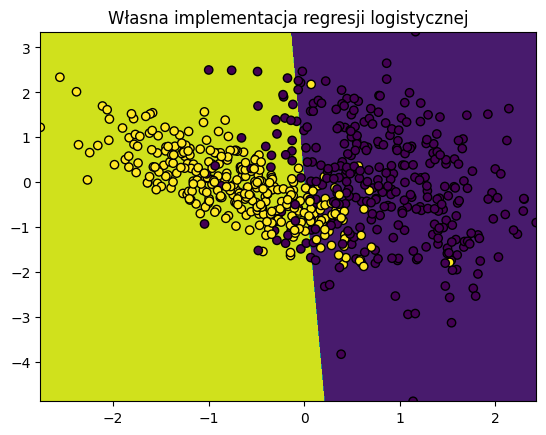

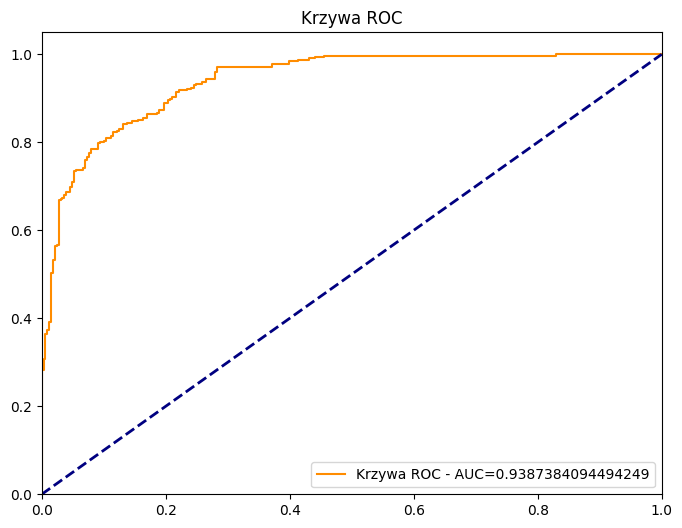

(2,)
	Własna implementacja regresji logistycznej dla moons

          	accuracy: 0.7131782945736435

          	sensitivity: 0.7138461538461538

          	specificity: 0.7125
        


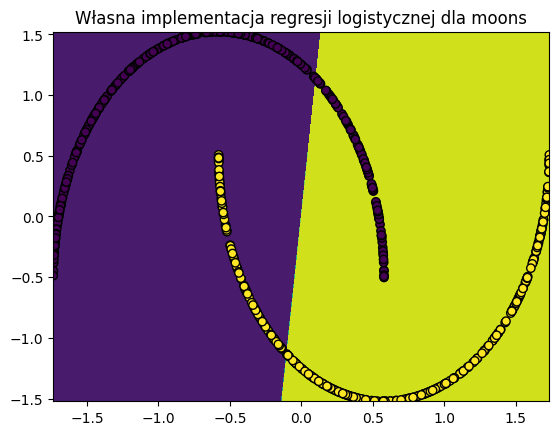

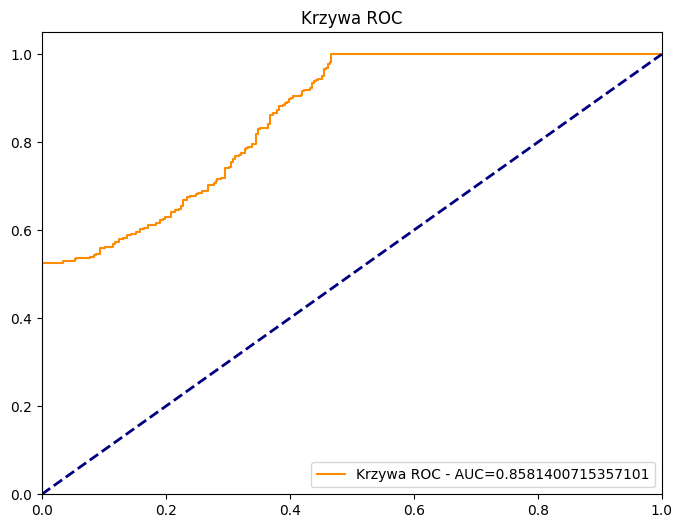

In [ ]:
reg = MyLogisticRegression()


reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_score=reg.sigmoid(X_test)
display_classifier_details(y_pred,y_test,"Własna implementacja regresji logistycznej")
plot_decision_boundary(X_test,y_test,reg,"Własna implementacja regresji logistycznej")
plot_roc_curve(y_test,y_score)

reg_moons=MyLogisticRegression()
reg_moons.fit(X_train_moons,y_train_moons)
y_pred_moons=reg_moons.predict(X_test_moons)
y_score_moons=reg_moons.sigmoid(X_test_moons)

display_classifier_details(y_pred_moons,y_test_moons,"Własna implementacja regresji logistycznej dla moons")
plot_decision_boundary(X_test_moons,y_test_moons,reg_moons,"Własna implementacja regresji logistycznej dla moons")
plot_roc_curve(y_test_moons,y_score_moons)

#%% [markdown] 

 # Zadanie na 3 - LogisticRegression z modułu scikit
Trenowanie modelu

	 LogisticRegression z modułu scikit

          	accuracy: 0.889922480620155

          	sensitivity: 0.8840125391849529

          	specificity: 0.8957055214723927
        


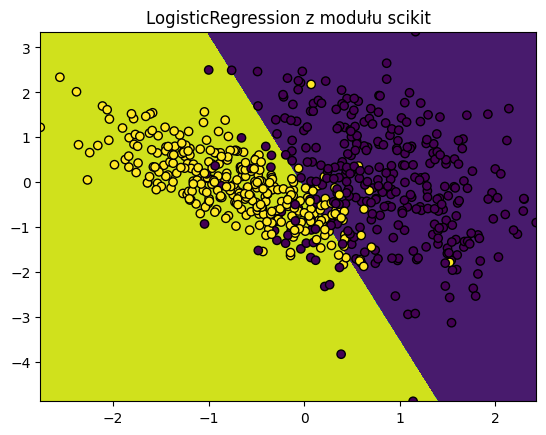

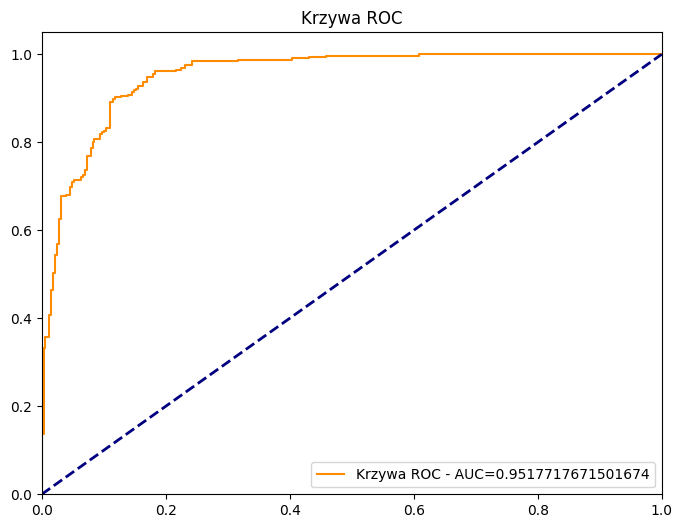

	Własna implementacja regresji logistycznej dla moons

          	accuracy: 0.9054263565891473

          	sensitivity: 0.9071207430340558

          	specificity: 0.9037267080745341
        


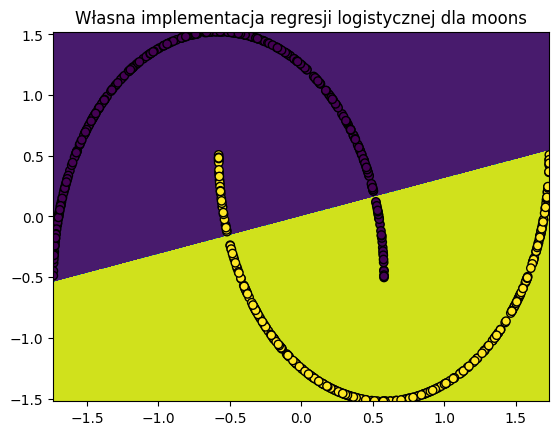

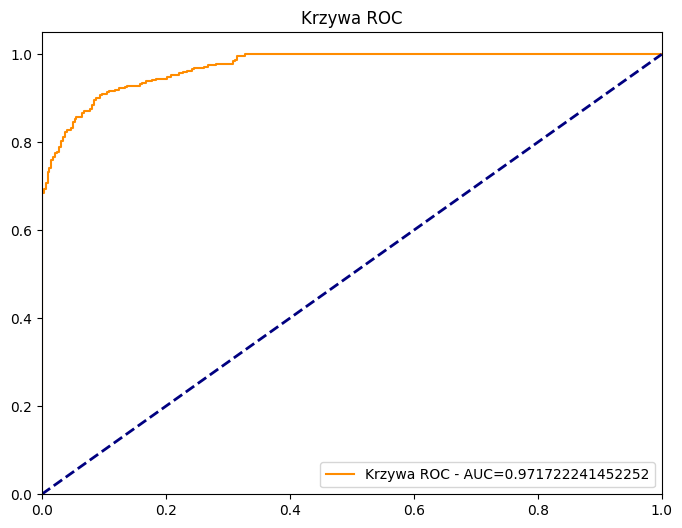

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_score=reg.decision_function(X_test)
display_classifier_details(y_pred,y_test," LogisticRegression z modułu scikit")
plot_decision_boundary(X_test,y_test,reg,"LogisticRegression z modułu scikit")
plot_roc_curve(y_test,y_score)

reg_moons=LogisticRegression()
reg_moons.fit(X_train_moons,y_train_moons)
y_pred_moons=reg_moons.predict(X_test_moons)
y_score_moons=reg_moons.decision_function(X_test_moons)

display_classifier_details(y_pred_moons,y_test_moons,"Własna implementacja regresji logistycznej dla moons")
plot_decision_boundary(X_test_moons,y_test_moons,reg_moons,"Własna implementacja regresji logistycznej dla moons")
plot_roc_curve(y_test_moons,y_score_moons)

#%% [markdown]

# Zadanie na 4 - preprocessing danych
# Usunięto cechy
- Evaporation
- Sunshine
- Cloud9am
- Cloud3pm
# Brakowało danych w:
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustDir
- WindGustSpeed
- WindDir9am
- WindDir3pm
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm
- RainToday
- RainTomorrow

#%% [markdown]

 # Zadanie na 4 - wczytanie danych i preprocessing danych

In [ ]:
australia = pd.read_csv('weatherAUS-original.csv')
australia.dropna(thresh=0.7*len(australia),axis=1,inplace=True)

#%%[markdown]

 # Zadanie na 4 - dalszy preprocessing

In [ ]:
categorical_columns=["Location","Date","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"]
numerical_columns=[col for col in australia.columns[2:] if not col in categorical_columns]
for col in categorical_columns:
    australia[col].fillna(australia[col].mode()[0],inplace=True)
for col in australia.columns[1:]:
    if not col in categorical_columns:
        australia[col].fillna(australia[col].median(),inplace=True)

<ipython-input-24-0a6c161f94f3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  australia[col].fillna(australia[col].mode()[0],inplace=True)
<ipython-input-24-0a6c161f94f3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

#%%[markdown]

 # Zadanie na 4 - winsoryzacja danych

In [ ]:
for column in numerical_columns:
        Q1=australia[column].quantile(0.25)
        Q3=australia[column].quantile(0.75)

        IQR=Q3-Q1

        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        lower_limit=(australia[column]<lower_bound).mean()
        upper_limit=(australia[column]>upper_bound).mean()

        australia[column]=stats.mstats.winsorize(australia[column],limits=(lower_limit,upper_limit))

In [ ]:
#%%

#Odseparowanie wartości przewidywanej
y=australia["RainTomorrow"]
australia = australia.drop('RainTomorrow', axis=1)
categorical_columns.remove("RainTomorrow")

#%% [markdown]

 # Normalizacja danych numerycznych

In [ ]:
scaler=StandardScaler()
australia[numerical_columns]=scaler.fit_transform(australia[numerical_columns])

#%% [markdown]

 # Zadanie na 4 - kodowanie zmiennych kategorycznych metodą one-hot

In [ ]:
australia=pd.get_dummies(australia,columns=categorical_columns[1:])

# %% [markdown] 

 # Zadanie na 4 - Trenowanie modeli dla poszczególnych regionów

	LogisticRegression dla Adelaide

          	accuracy: 0.8660826032540676

          	sensitivity: 0.7557251908396947

          	specificity: 0.8877245508982036
        


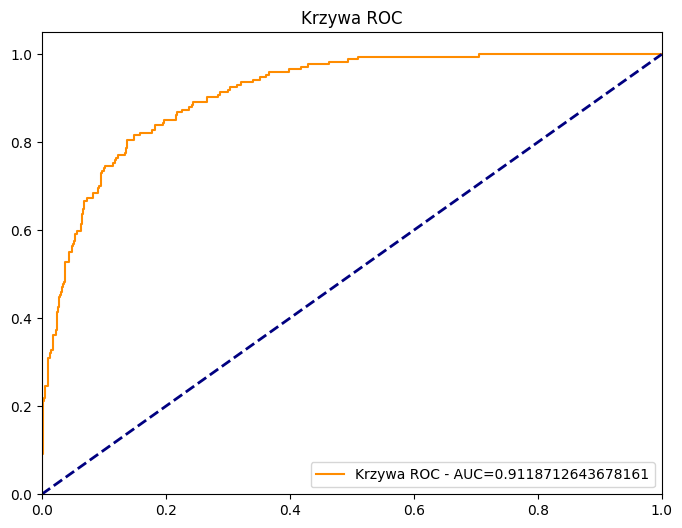

	LogisticRegression dla Albany

          	accuracy: 0.7789473684210526

          	sensitivity: 0.691358024691358

          	specificity: 0.802675585284281
        


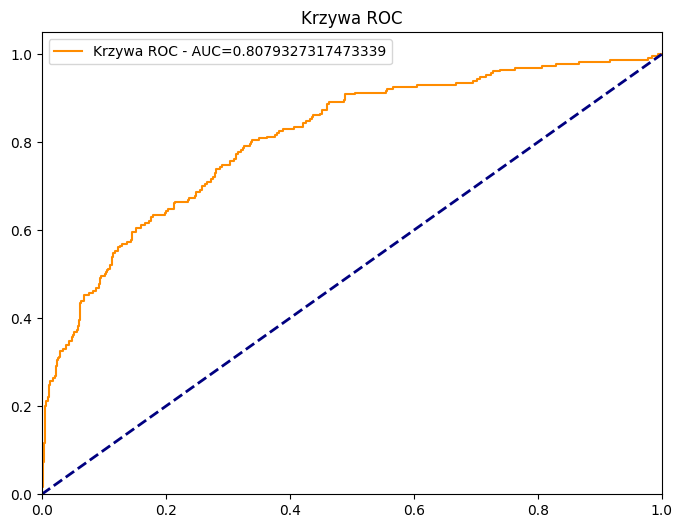

	LogisticRegression dla Albury

          	accuracy: 0.8842105263157894

          	sensitivity: 0.725

          	specificity: 0.9140625
        


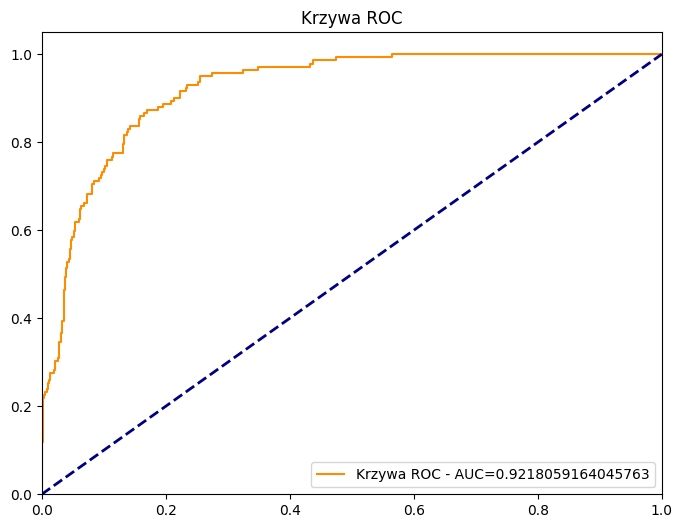

	LogisticRegression dla AliceSprings

          	accuracy: 0.9434210526315789

          	sensitivity: 0.7297297297297297

          	specificity: 0.9543568464730291
        


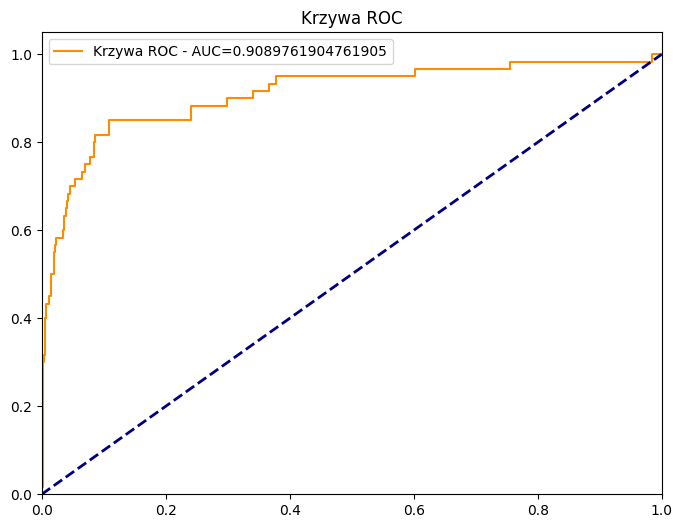

	LogisticRegression dla BadgerysCreek

          	accuracy: 0.852589641434263

          	sensitivity: 0.6982758620689655

          	specificity: 0.880690737833595
        


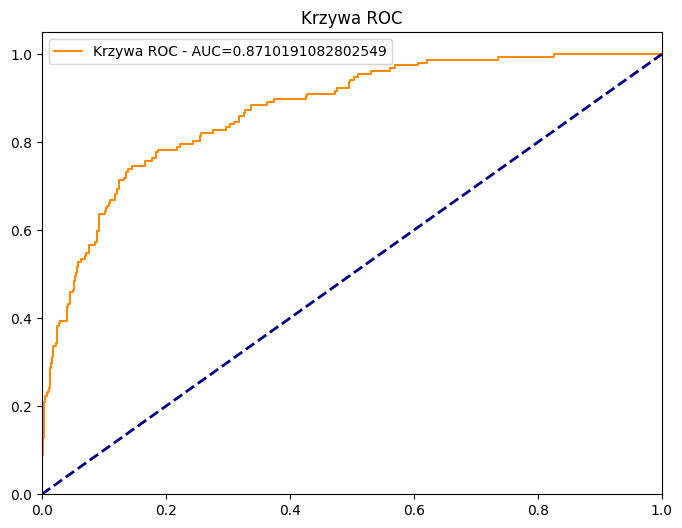

	LogisticRegression dla Ballarat

          	accuracy: 0.8605263157894737

          	sensitivity: 0.8383233532934131

          	specificity: 0.866779089376054
        


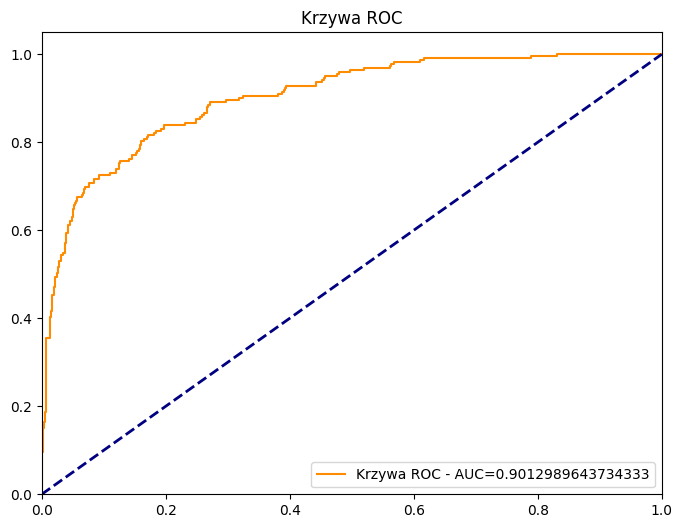

	LogisticRegression dla Bendigo

          	accuracy: 0.8934210526315789

          	sensitivity: 0.7525773195876289

          	specificity: 0.9140271493212669
        


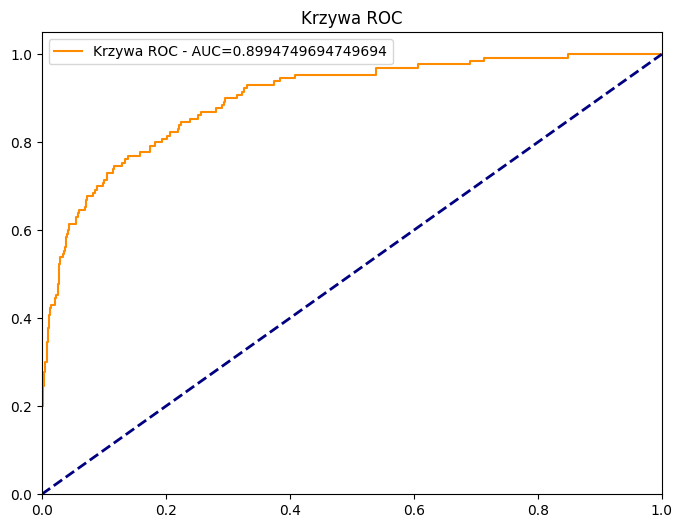

	LogisticRegression dla Brisbane

          	accuracy: 0.867334167709637

          	sensitivity: 0.8053097345132744

          	specificity: 0.8775510204081632
        


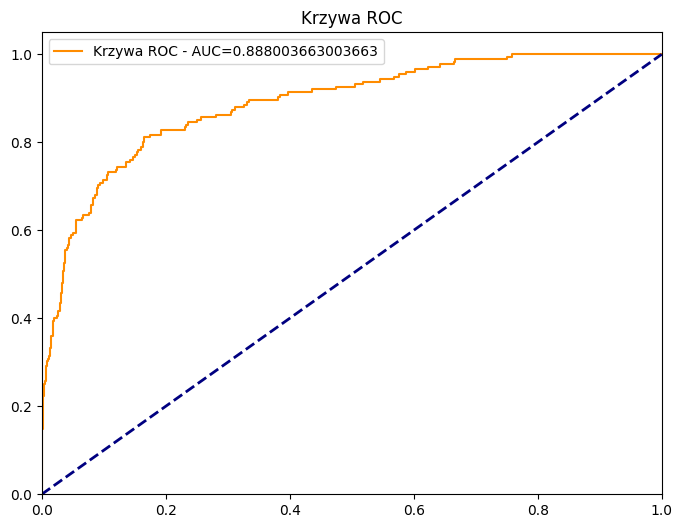

	LogisticRegression dla Cairns

          	accuracy: 0.8118421052631579

          	sensitivity: 0.6918918918918919

          	specificity: 0.8504347826086956
        


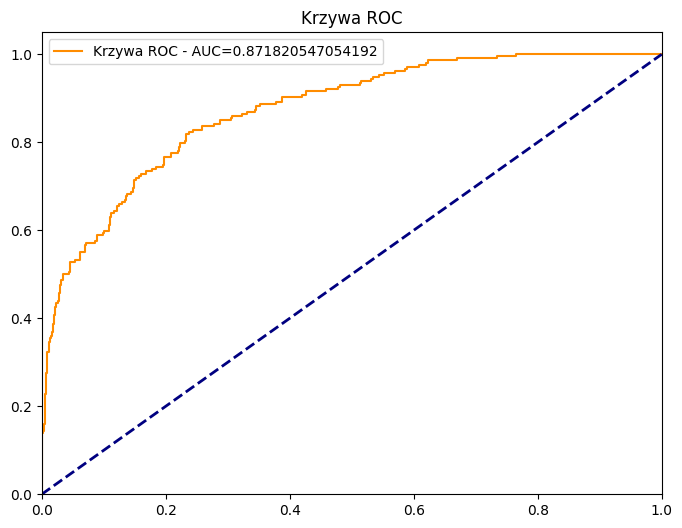

	LogisticRegression dla Canberra

          	accuracy: 0.8777648428405123

          	sensitivity: 0.77

          	specificity: 0.8919631093544137
        


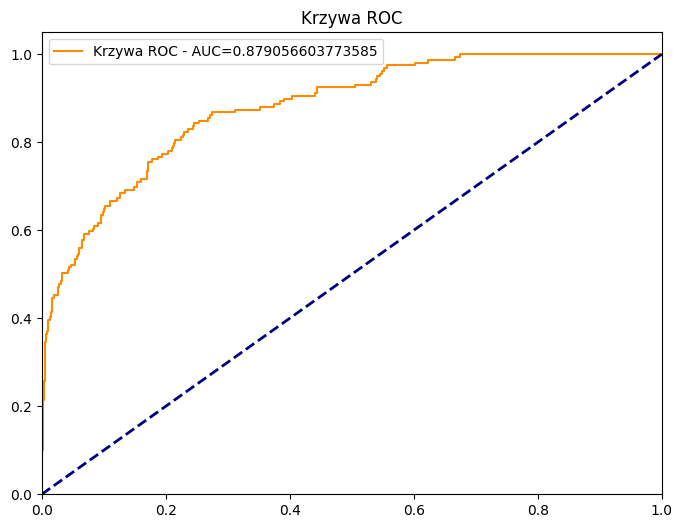

	LogisticRegression dla Cobar

          	accuracy: 0.897742363877822

          	sensitivity: 0.7419354838709677

          	specificity: 0.9117221418234442
        


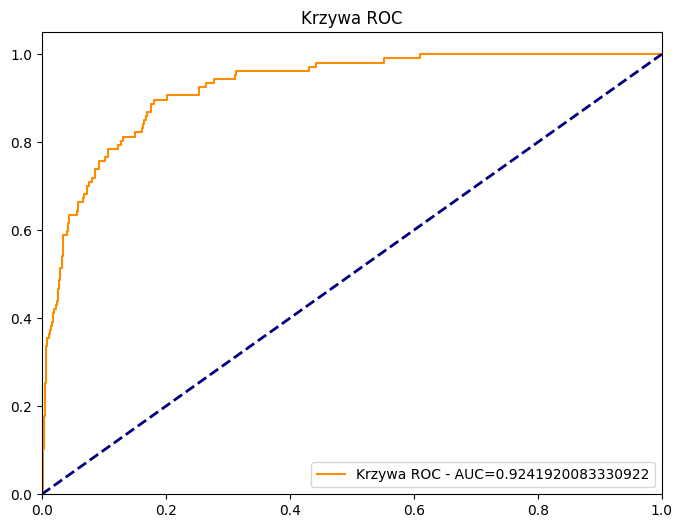

	LogisticRegression dla CoffsHarbour

          	accuracy: 0.8393094289508632

          	sensitivity: 0.7716049382716049

          	specificity: 0.8578680203045685
        


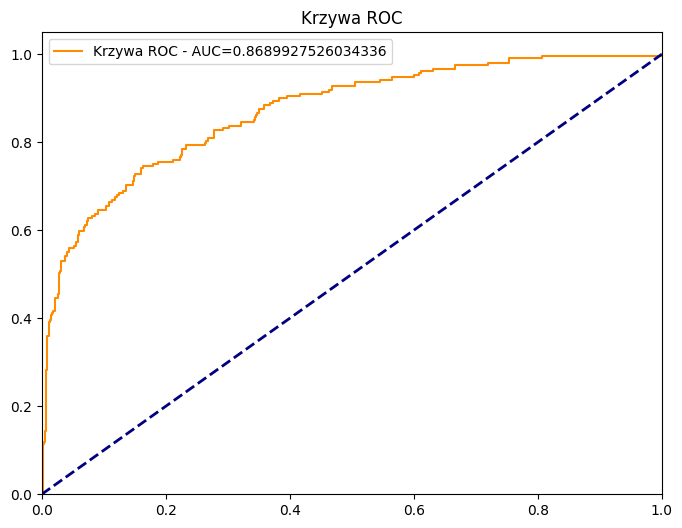

	LogisticRegression dla Dartmoor

          	accuracy: 0.8459495351925631

          	sensitivity: 0.7839195979899497

          	specificity: 0.868231046931408
        


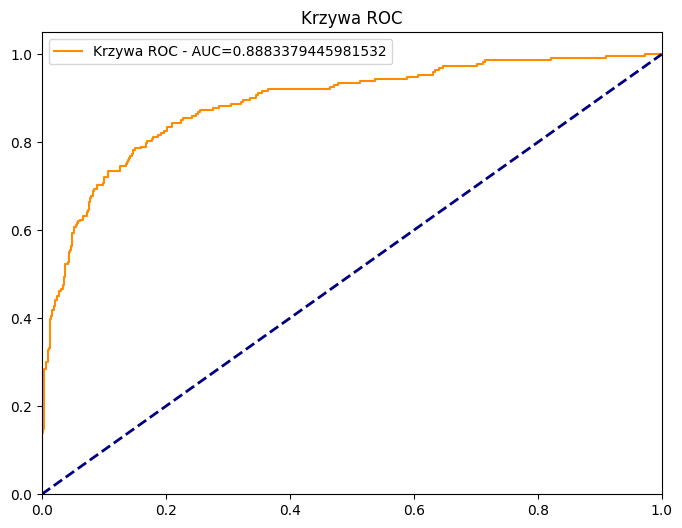

	LogisticRegression dla Darwin

          	accuracy: 0.8485607008760951

          	sensitivity: 0.7287234042553191

          	specificity: 0.8854337152209493
        


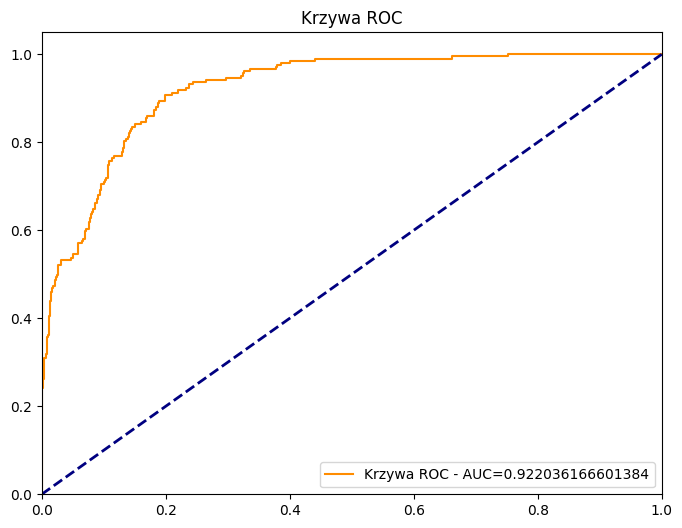

	LogisticRegression dla GoldCoast

          	accuracy: 0.8513157894736842

          	sensitivity: 0.8170731707317073

          	specificity: 0.860738255033557
        


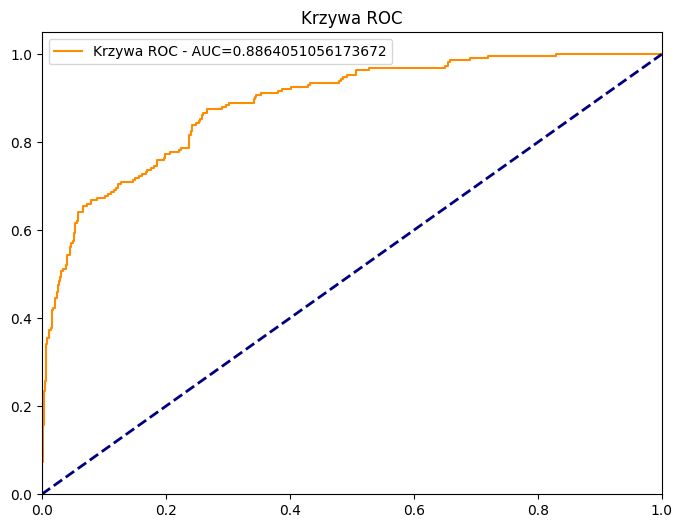

	LogisticRegression dla Hobart

          	accuracy: 0.8085106382978723

          	sensitivity: 0.6417910447761194

          	specificity: 0.8421052631578947
        


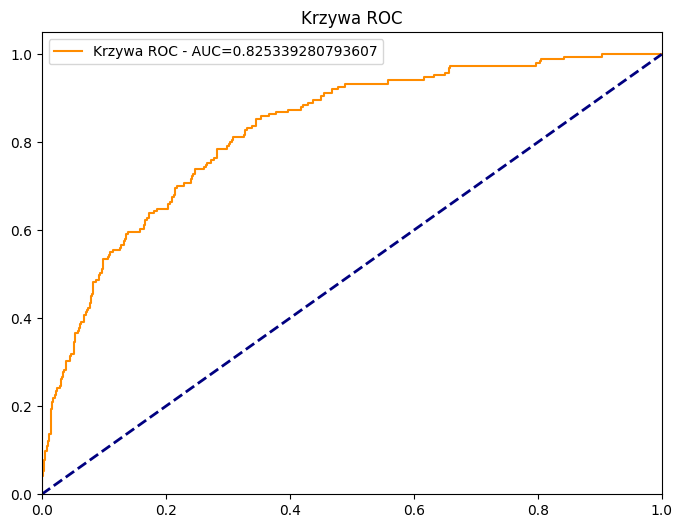

	LogisticRegression dla Katherine

          	accuracy: 0.8607594936708861

          	sensitivity: 0.5272727272727272

          	specificity: 0.9147058823529411
        


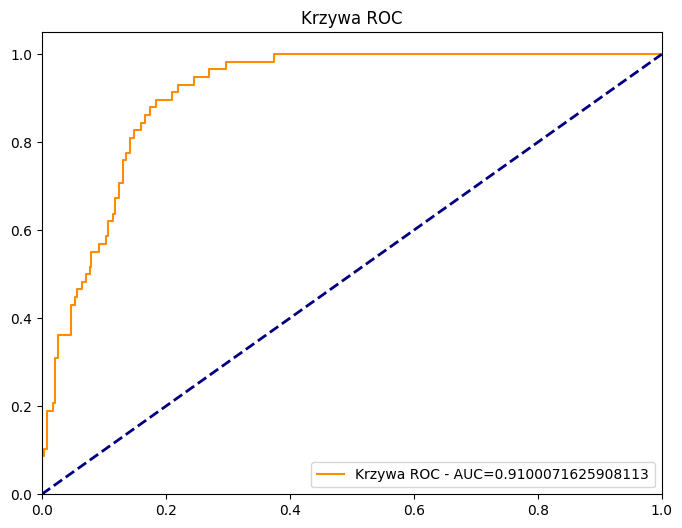

	LogisticRegression dla Launceston

          	accuracy: 0.8723684210526316

          	sensitivity: 0.7851851851851852

          	specificity: 0.8912
        


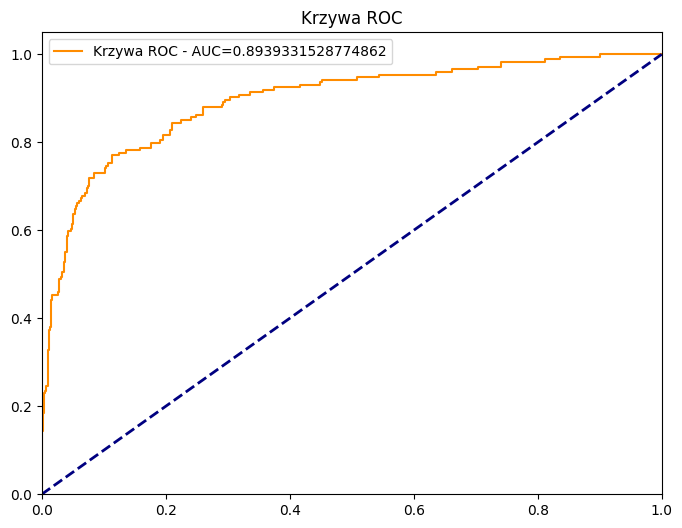

	LogisticRegression dla Melbourne

          	accuracy: 0.8523153942428036

          	sensitivity: 0.7377049180327869

          	specificity: 0.8617886178861789
        


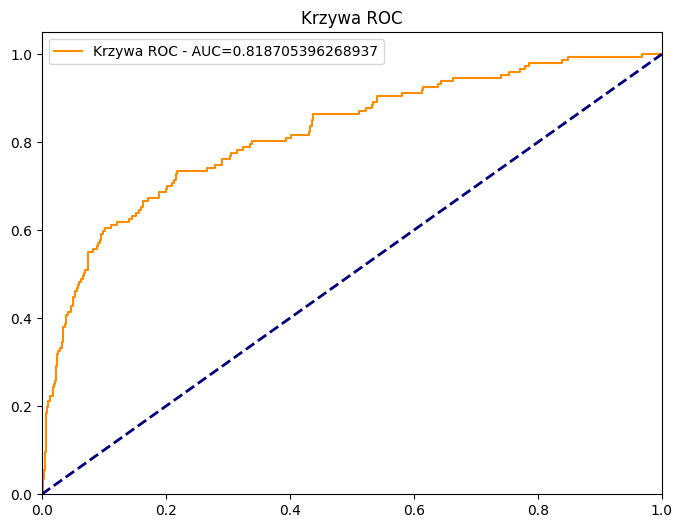

	LogisticRegression dla MelbourneAirport

          	accuracy: 0.8379814077025233

          	sensitivity: 0.6886792452830188

          	specificity: 0.8624420401854714
        


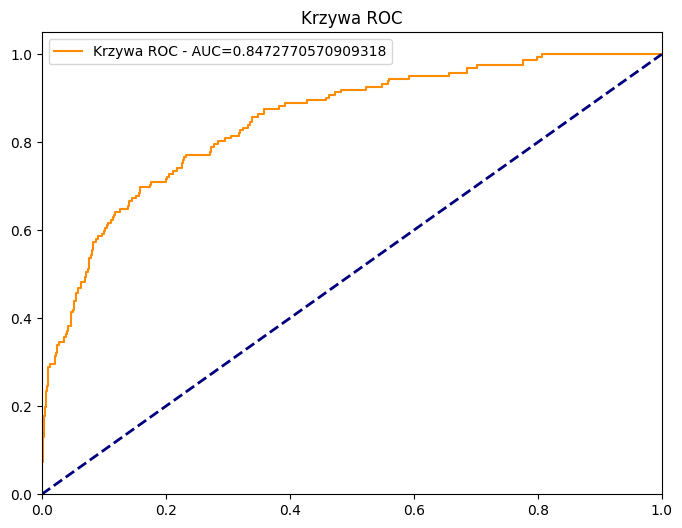

	LogisticRegression dla Mildura

          	accuracy: 0.9083665338645418

          	sensitivity: 0.6811594202898551

          	specificity: 0.9312865497076024
        


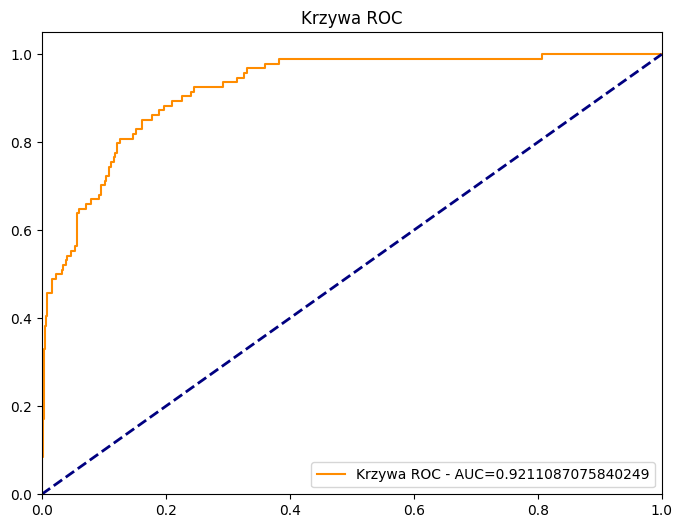

	LogisticRegression dla Moree

          	accuracy: 0.8897742363877822

          	sensitivity: 0.6721311475409836

          	specificity: 0.9089595375722543
        


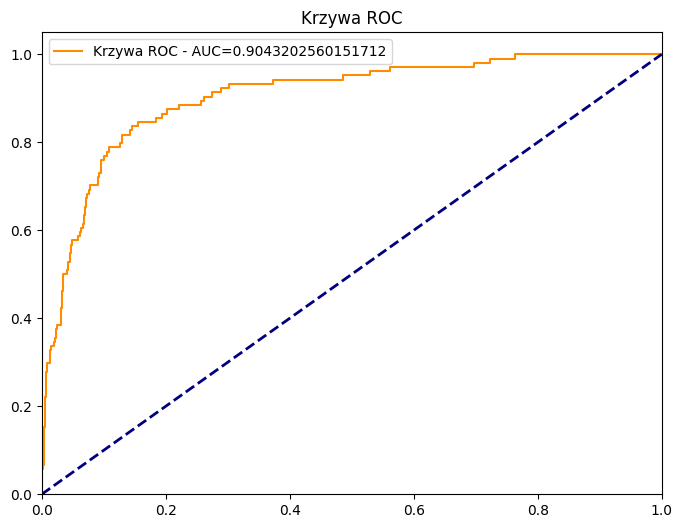

	LogisticRegression dla MountGambier

          	accuracy: 0.8578947368421053

          	sensitivity: 0.8315217391304348

          	specificity: 0.8663194444444444
        


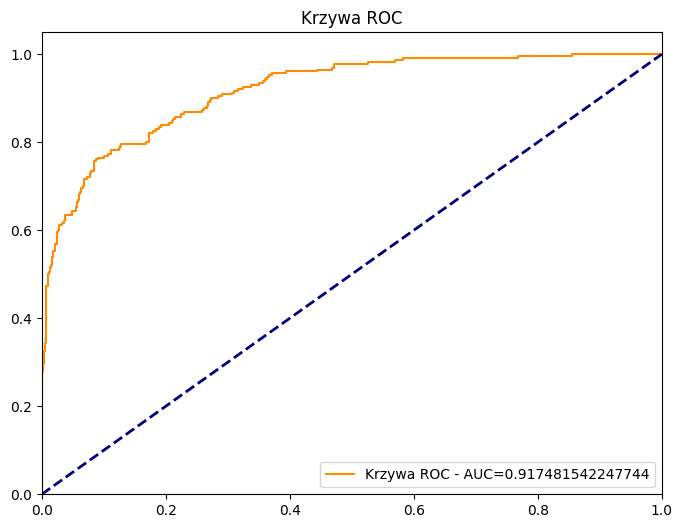

	LogisticRegression dla MountGinini

          	accuracy: 0.8052631578947368

          	sensitivity: 0.6894409937888198

          	specificity: 0.8363939899833055
        


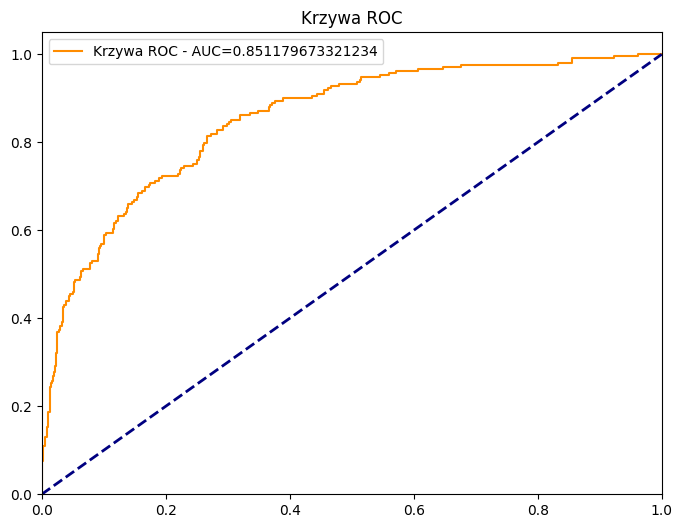

	LogisticRegression dla Newcastle

          	accuracy: 0.7934210526315789

          	sensitivity: 0.5909090909090909

          	specificity: 0.8126801152737753
        


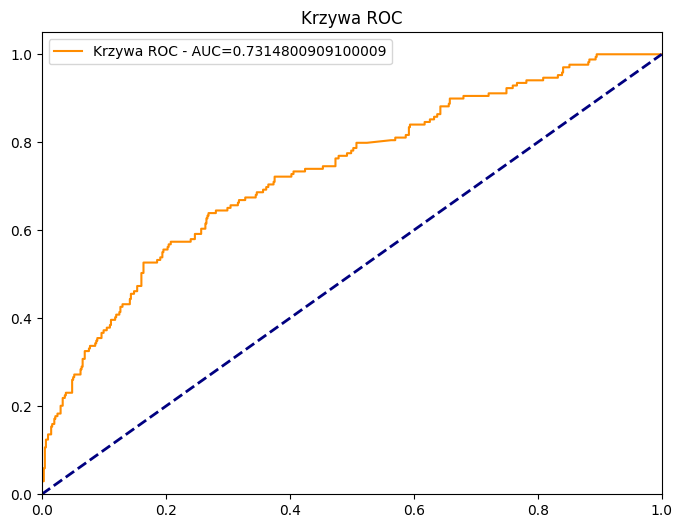

	LogisticRegression dla Nhil

          	accuracy: 0.8987341772151899

          	sensitivity: 0.6808510638297872

          	specificity: 0.9281609195402298
        


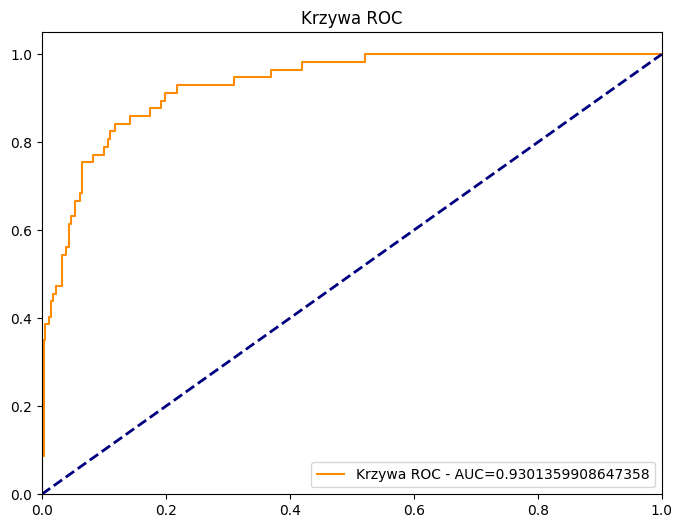

	LogisticRegression dla NorahHead

          	accuracy: 0.8242343541944075

          	sensitivity: 0.7432432432432432

          	specificity: 0.8441127694859039
        


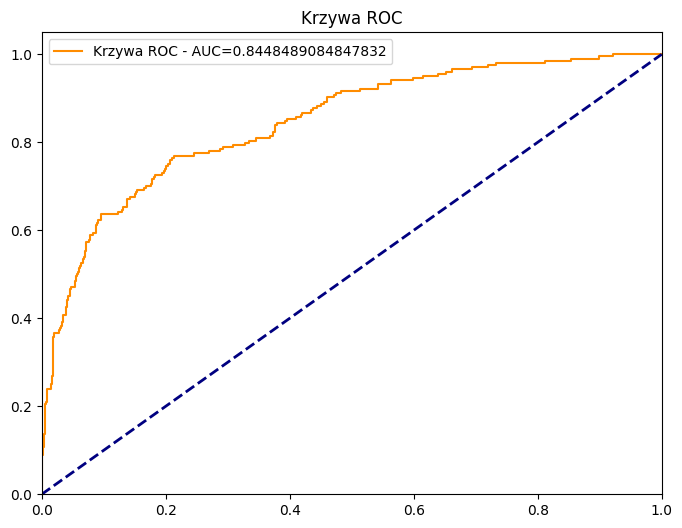

	LogisticRegression dla NorfolkIsland

          	accuracy: 0.7822045152722443

          	sensitivity: 0.6802721088435374

          	specificity: 0.806930693069307
        


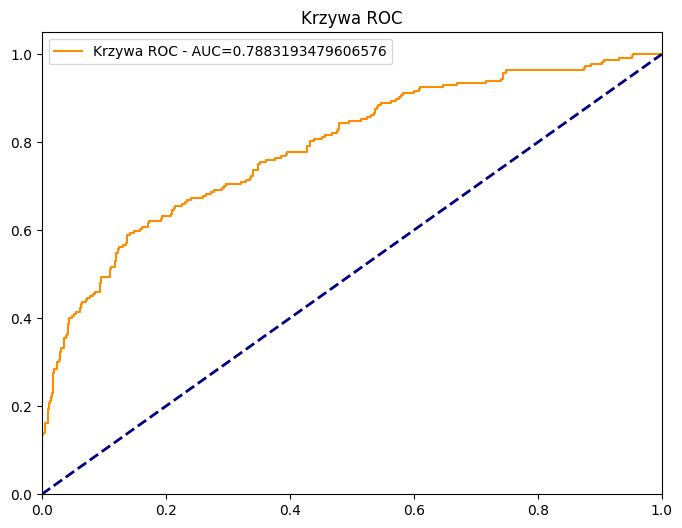

	LogisticRegression dla Nuriootpa

          	accuracy: 0.8685258964143426

          	sensitivity: 0.7022900763358778

          	specificity: 0.9035369774919614
        


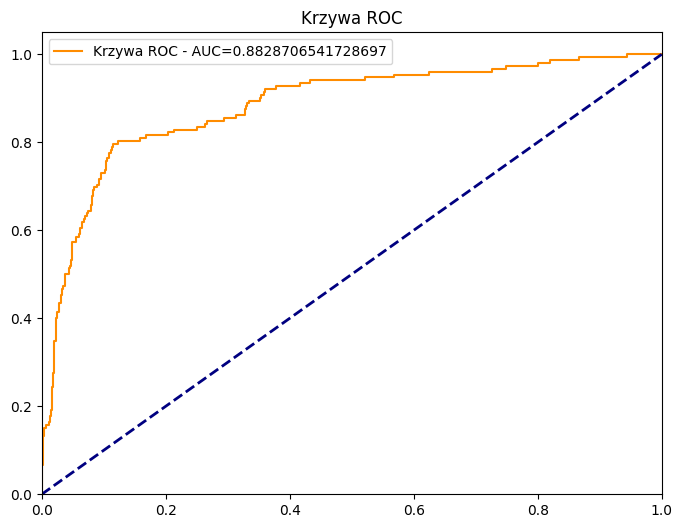

	LogisticRegression dla PearceRAAF

          	accuracy: 0.8857901726427623

          	sensitivity: 0.7764705882352941

          	specificity: 0.8997005988023952
        


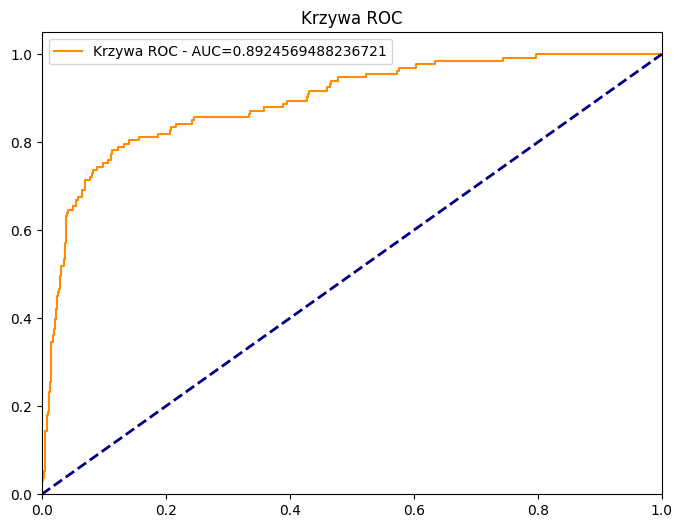

	LogisticRegression dla Penrith

          	accuracy: 0.875

          	sensitivity: 0.6893203883495146

          	specificity: 0.9041095890410958
        


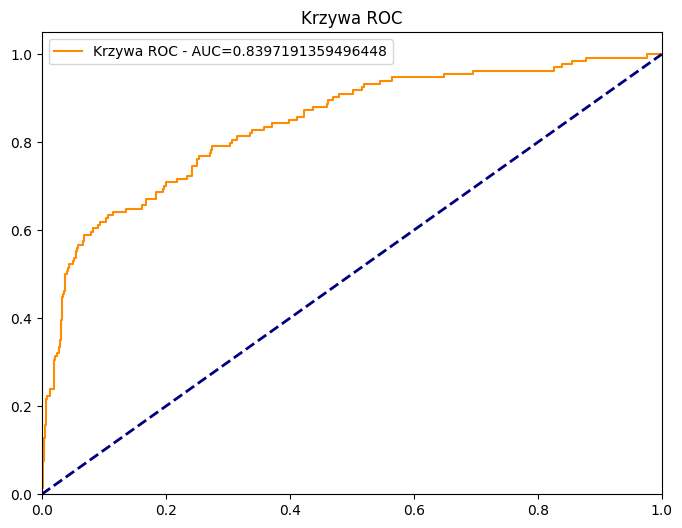

	LogisticRegression dla Perth

          	accuracy: 0.8948685857321652

          	sensitivity: 0.823076923076923

          	specificity: 0.9088191330343797
        


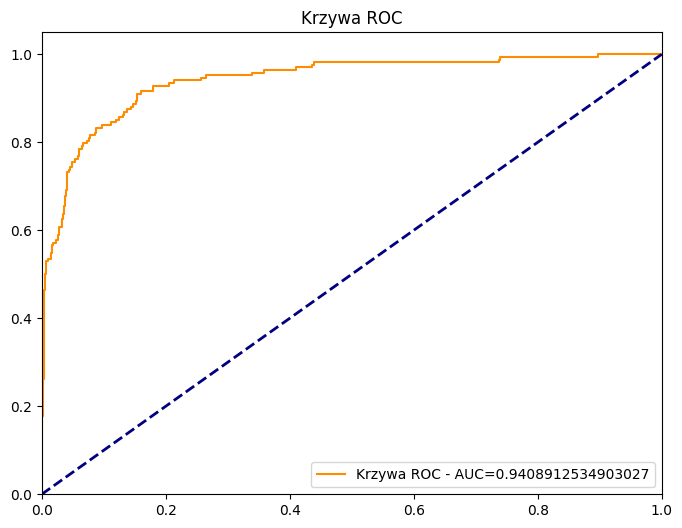

	LogisticRegression dla PerthAirport

          	accuracy: 0.9176626826029216

          	sensitivity: 0.7878787878787878

          	specificity: 0.9452495974235104
        


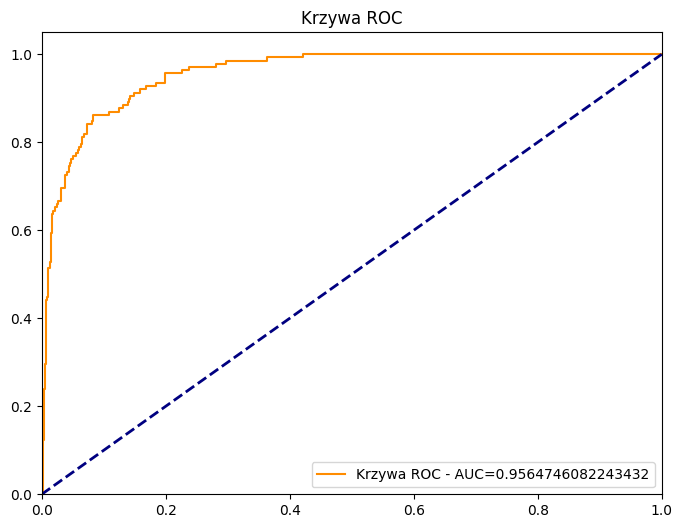

	LogisticRegression dla Portland

          	accuracy: 0.796812749003984

          	sensitivity: 0.7918552036199095

          	specificity: 0.7988721804511278
        


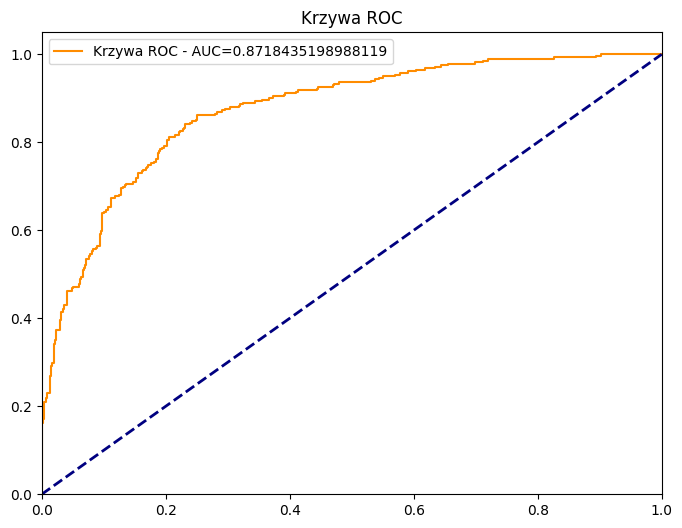

	LogisticRegression dla Richmond

          	accuracy: 0.896414342629482

          	sensitivity: 0.7954545454545454

          	specificity: 0.9097744360902256
        


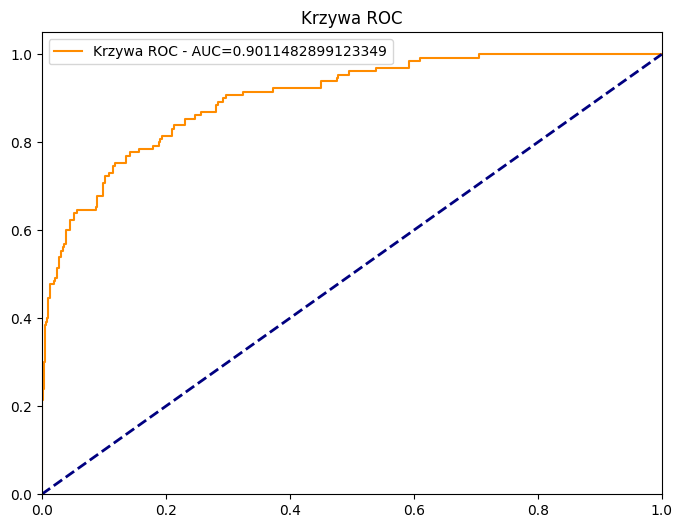

	LogisticRegression dla Sale

          	accuracy: 0.8446215139442231

          	sensitivity: 0.6050420168067226

          	specificity: 0.889589905362776
        


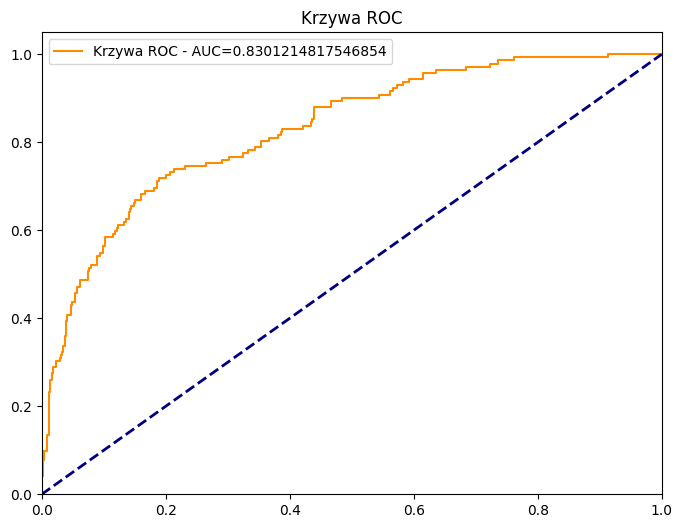

	LogisticRegression dla SalmonGums

          	accuracy: 0.8735019973368842

          	sensitivity: 0.6111111111111112

          	specificity: 0.9013254786450663
        


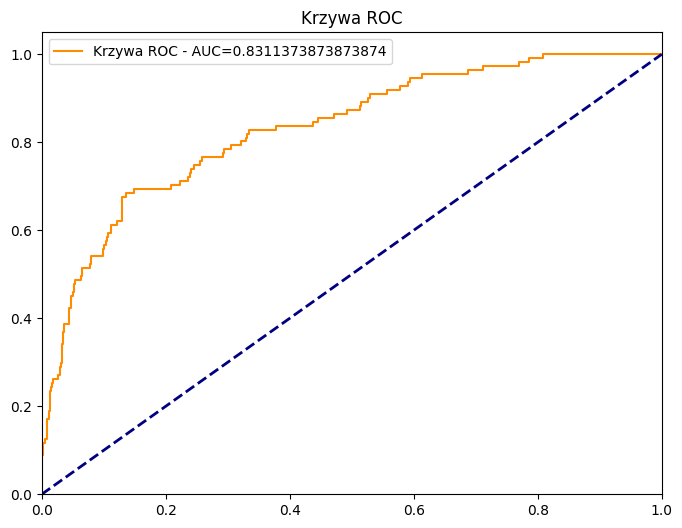

	LogisticRegression dla Sydney

          	accuracy: 0.8349282296650717

          	sensitivity: 0.7567567567567568

          	specificity: 0.8517441860465116
        


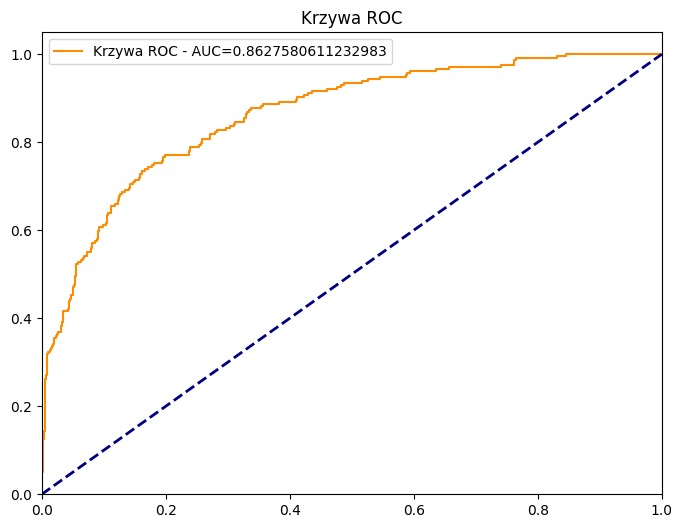

	LogisticRegression dla SydneyAirport

          	accuracy: 0.8273572377158035

          	sensitivity: 0.7430555555555556

          	specificity: 0.8472906403940886
        


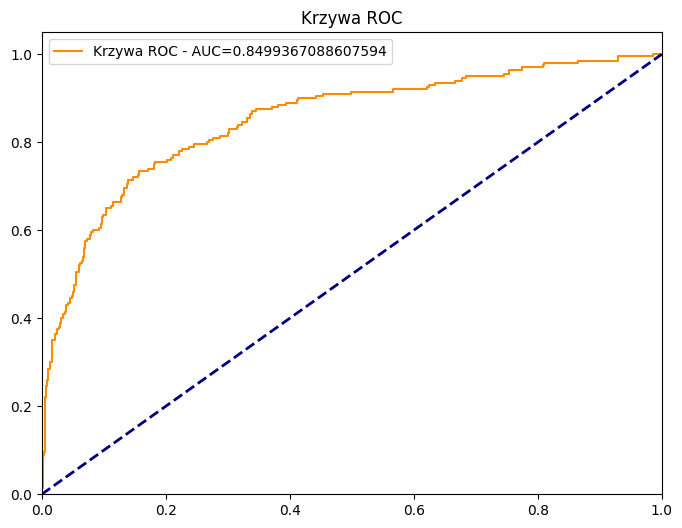

	LogisticRegression dla Townsville

          	accuracy: 0.8776315789473684

          	sensitivity: 0.7931034482758621

          	specificity: 0.888558692421991
        


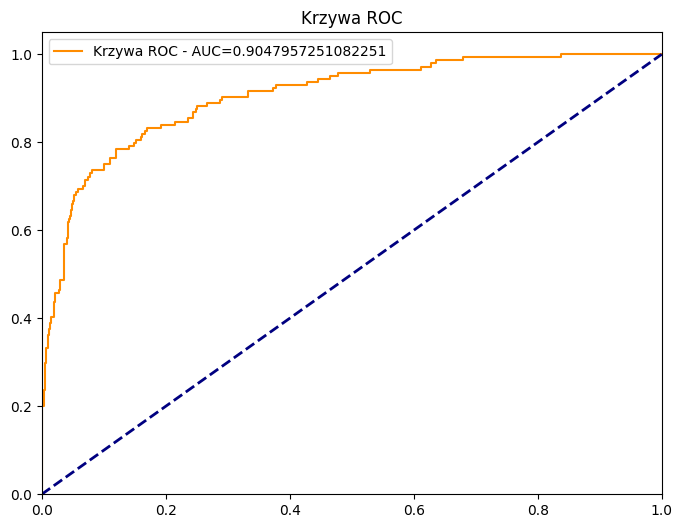

	LogisticRegression dla Tuggeranong

          	accuracy: 0.8789473684210526

          	sensitivity: 0.8247422680412371

          	specificity: 0.8868778280542986
        


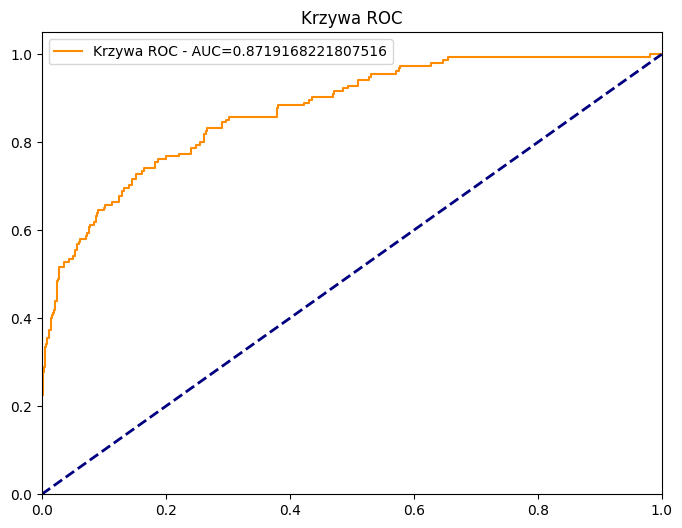

	LogisticRegression dla Uluru

          	accuracy: 0.9417721518987342

          	sensitivity: 0.6363636363636364

          	specificity: 0.9597855227882037
        


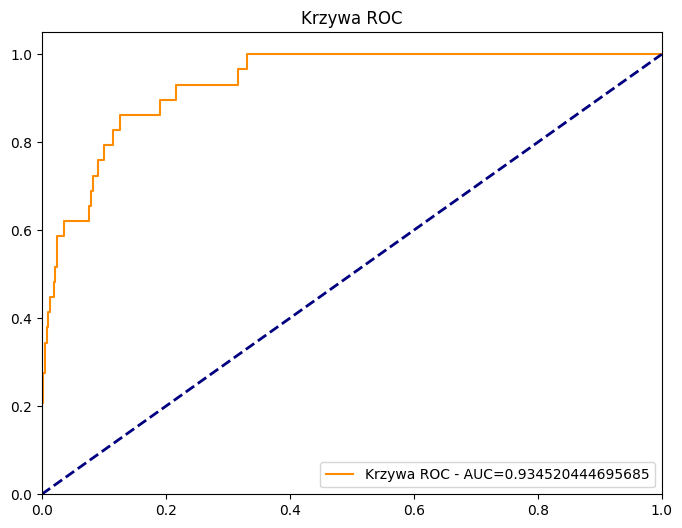

	LogisticRegression dla WaggaWagga

          	accuracy: 0.8950863213811421

          	sensitivity: 0.7551020408163265

          	specificity: 0.916030534351145
        


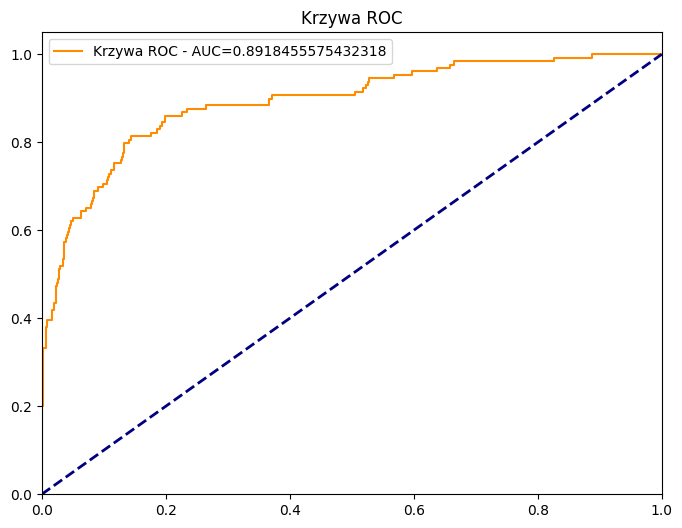

	LogisticRegression dla Walpole

          	accuracy: 0.8138297872340425

          	sensitivity: 0.725

          	specificity: 0.8460144927536232
        


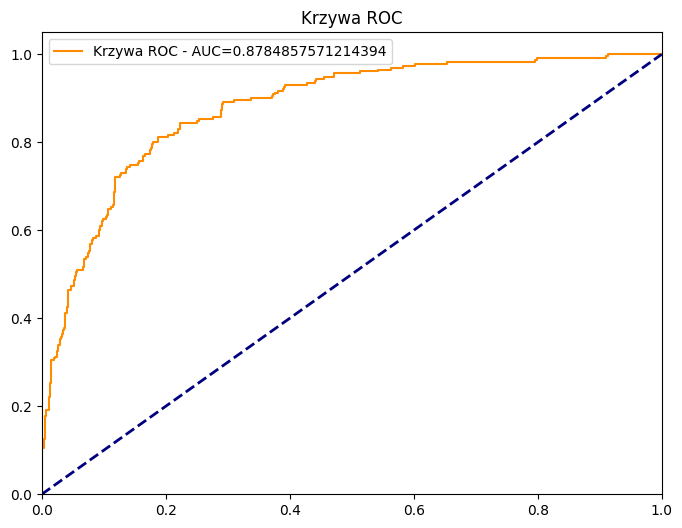

	LogisticRegression dla Watsonia

          	accuracy: 0.8127490039840638

          	sensitivity: 0.6783216783216783

          	specificity: 0.8442622950819673
        


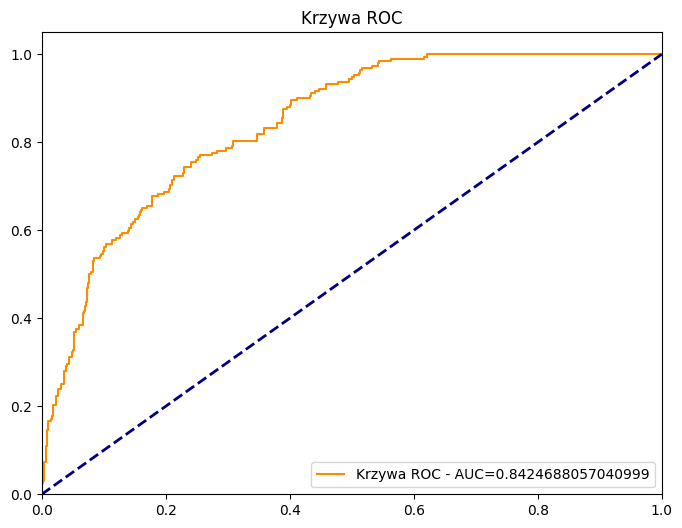

	LogisticRegression dla Williamtown

          	accuracy: 0.798140770252324

          	sensitivity: 0.696969696969697

          	specificity: 0.8134556574923547
        


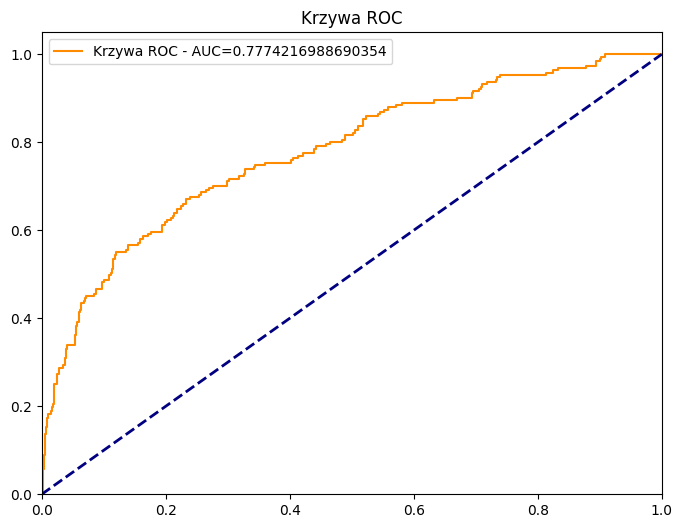

	LogisticRegression dla Witchcliffe

          	accuracy: 0.8618857901726428

          	sensitivity: 0.7560975609756098

          	specificity: 0.9014598540145985
        


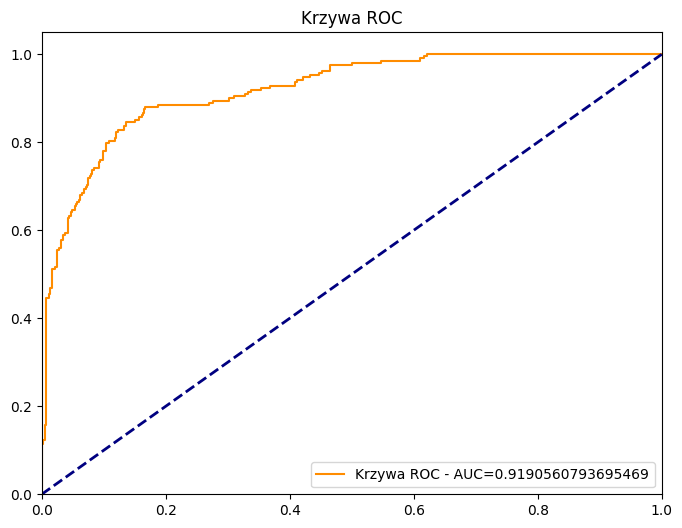

	LogisticRegression dla Wollongong

          	accuracy: 0.825

          	sensitivity: 0.696

          	specificity: 0.8503937007874016
        


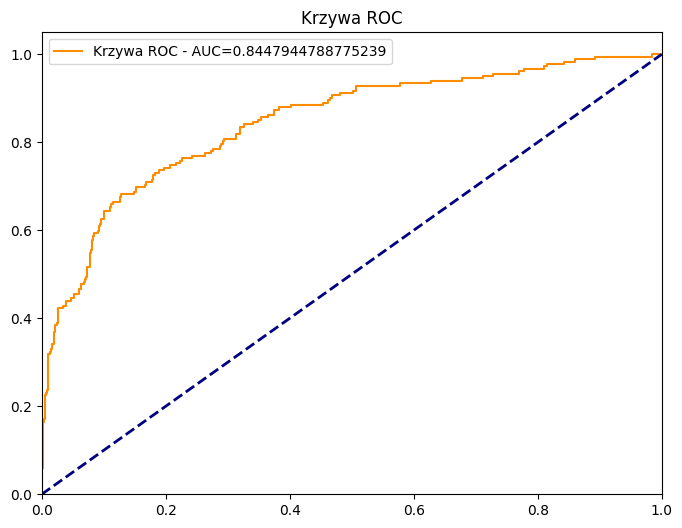

	LogisticRegression dla Woomera

          	accuracy: 0.9455511288180611

          	sensitivity: 0.6153846153846154

          	specificity: 0.9573590096286108
        


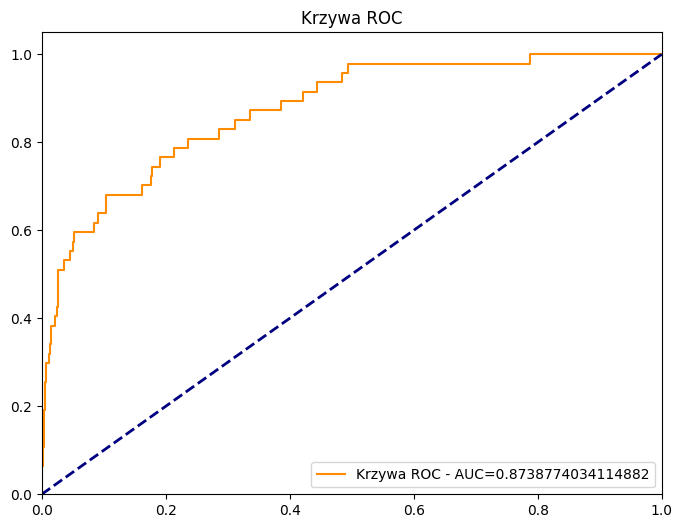

Najlepszy wynik uzyskał model z Woomera. Accuracy=0.9455511288180611


<ipython-input-29-bce0432329a2>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_national_test=np.array(X_national_test)
<ipython-input-29-bce0432329a2>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_national_test=np.array(y_national_test)


In [ ]:
models={}
X_national_test=[]
best_regional_model=["",None,0]
y_national_test=[]
for location in np.unique(australia["Location"].values):
    data=australia[australia["Location"]==location]
    X=data.iloc[:,1:]
    
    y2=y[australia["Location"]==location]=="Yes" 

    X_train, X_test, y_train, y_test=train_test_split(X,y2)
    X_national_test.append(X_test)
    y_national_test.append(y_test)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    models[location]=reg
    y_pred=reg.predict(X_test)
    y_score=reg.decision_function(X_test)
    if(score:=accuracy_score(y_test,y_pred))>best_regional_model[2]:
        best_regional_model=[location,reg,score]


    display_classifier_details(y_pred,y_test,f"LogisticRegression dla {location}")
    plot_roc_curve(y_test,y_score)

print(f"Najlepszy wynik uzyskał model z {best_regional_model[0]}. Accuracy={best_regional_model[2]}")

X_national_test=np.array(X_national_test)
y_national_test=np.array(y_national_test)

In [ ]:
#%%

X_national_test=np.vstack(X_national_test)

y_national_test=np.hstack(y_national_test)

#%% [markdown]

 # Zadanie na 5 - porównanie działania modeli na krajowym zbiorze

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Adelaide

          	accuracy: 0.8078487413433

          	sensitivity: 0.5581956338198046

          	specificity: 0.8815175997437449
        


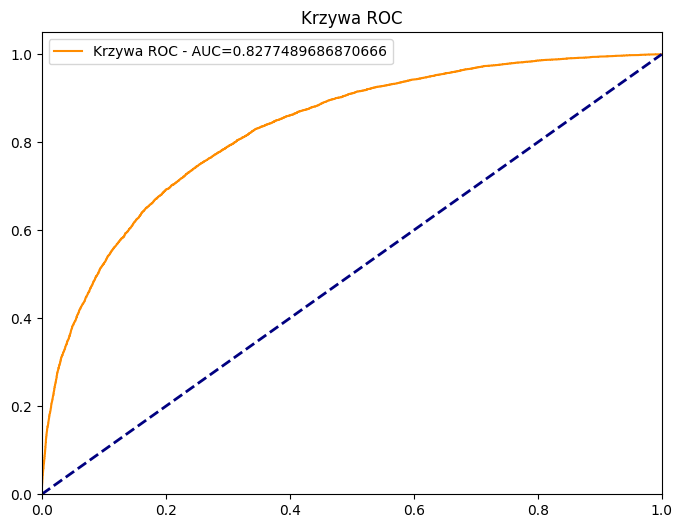

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Albany

          	accuracy: 0.7809167857535452

          	sensitivity: 0.4990210155332202

          	specificity: 0.8560935705085808
        


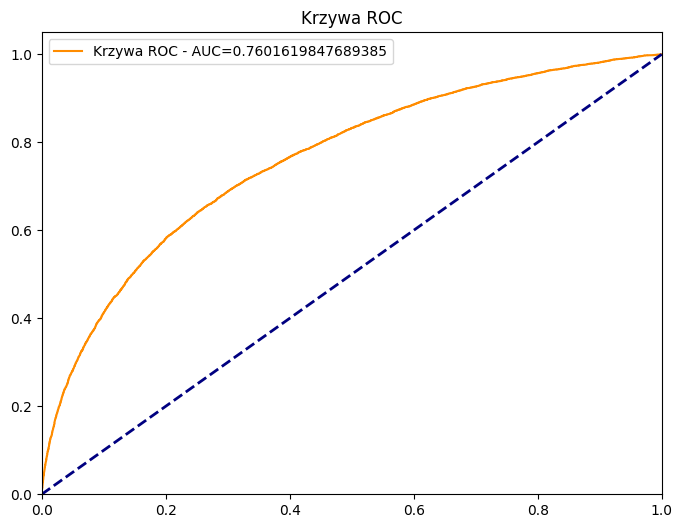

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Albury

          	accuracy: 0.7714631197097944

          	sensitivity: 0.4833379745660447

          	specificity: 0.8926410306461058
        


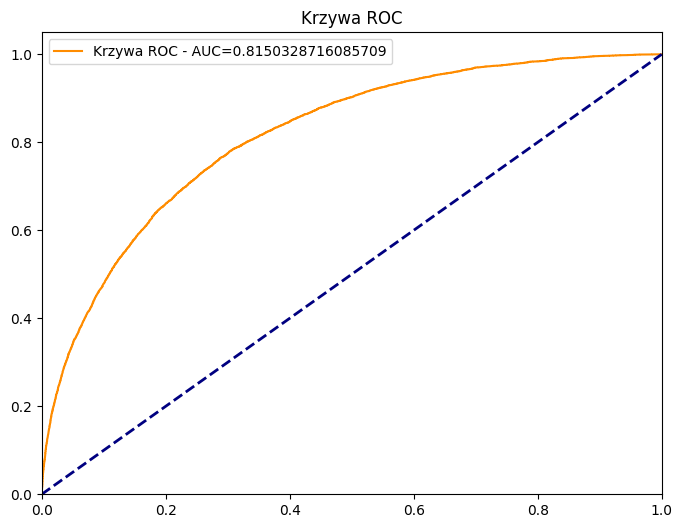

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w AliceSprings

          	accuracy: 0.8069693305485325

          	sensitivity: 0.5545167698959916

          	specificity: 0.884589127232223
        


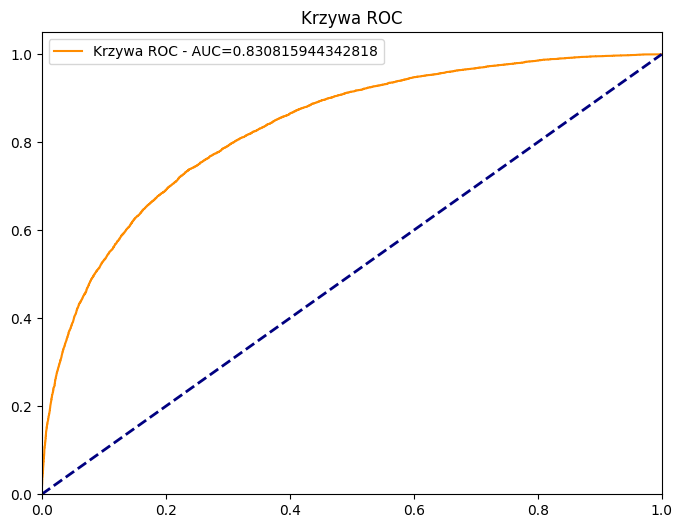

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w BadgerysCreek

          	accuracy: 0.8270034077168297

          	sensitivity: 0.6225663716814159

          	specificity: 0.873817887057552
        


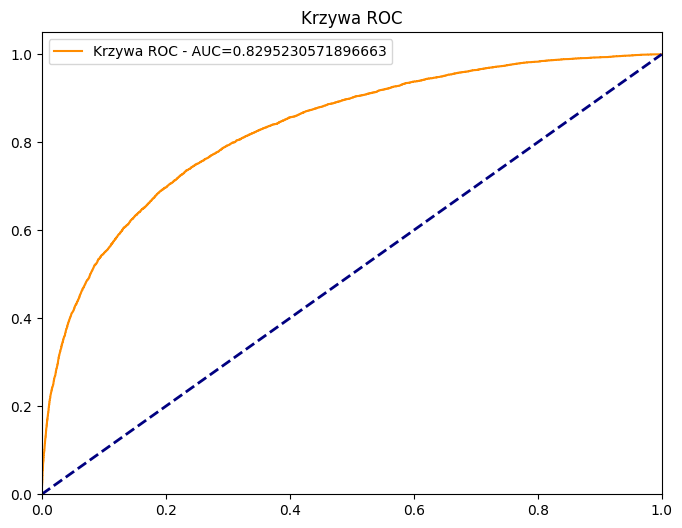

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Ballarat

          	accuracy: 0.8085357810267121

          	sensitivity: 0.5687118267629095

          	specificity: 0.8677357456140351
        


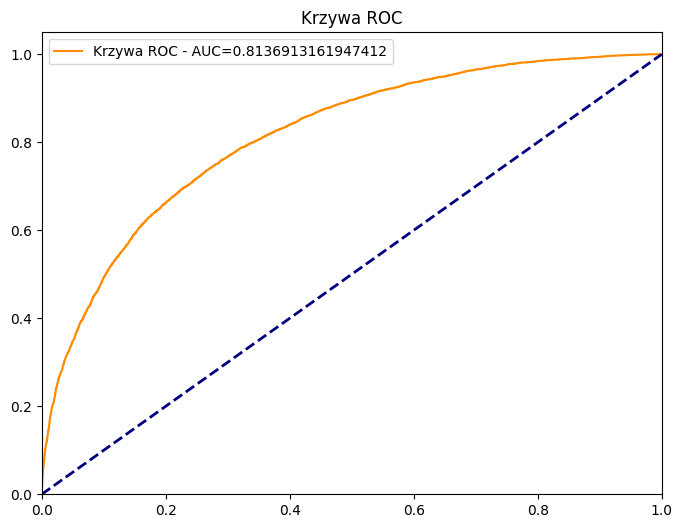

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Bendigo

          	accuracy: 0.8061723645157745

          	sensitivity: 0.5613297150610583

          	specificity: 0.8683575711627266
        


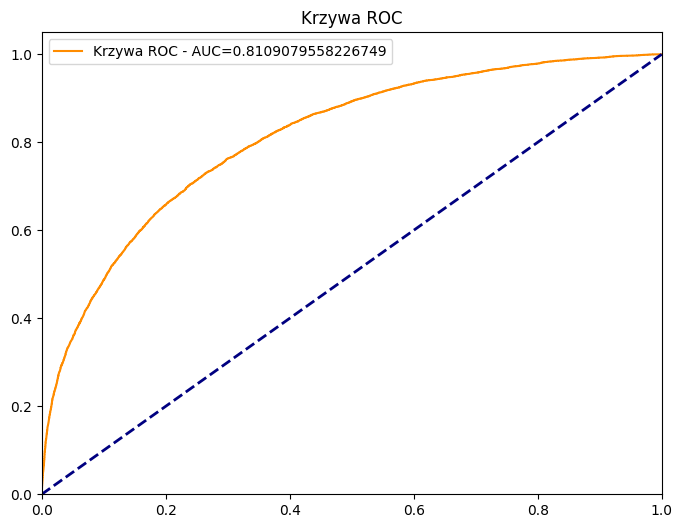

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Brisbane

          	accuracy: 0.8096350445201714

          	sensitivity: 0.5621680347658136

          	specificity: 0.8825789923142613
        


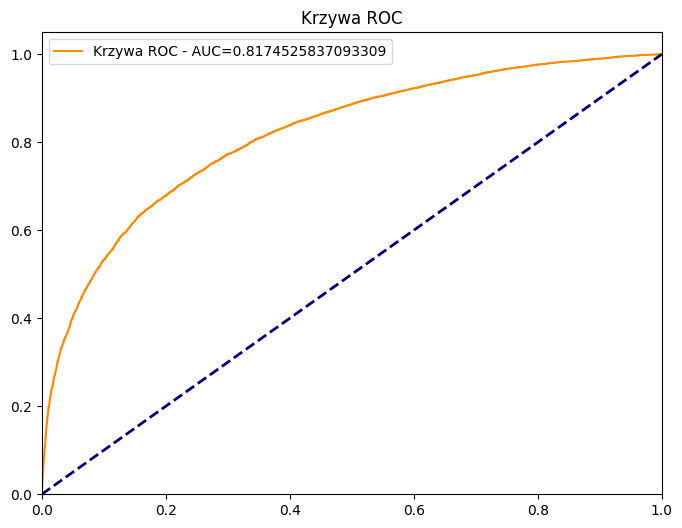

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Cairns

          	accuracy: 0.810624381664285

          	sensitivity: 0.6742969260954872

          	specificity: 0.8231323132313232
        


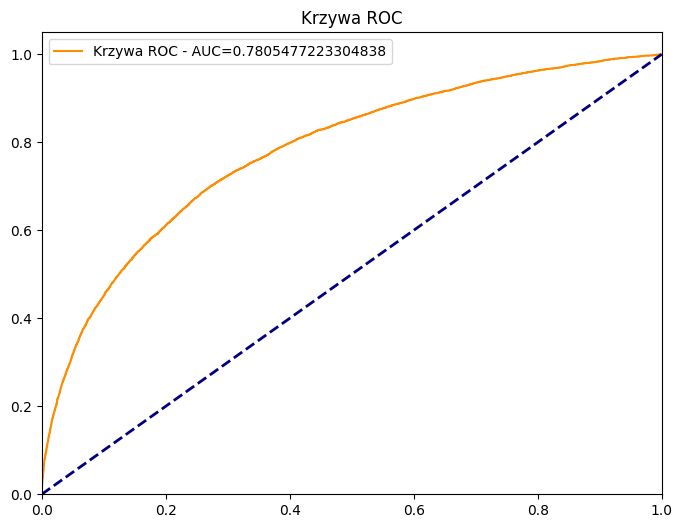

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Canberra

          	accuracy: 0.7915521600527646

          	sensitivity: 0.5205162144275315

          	specificity: 0.881487446014201
        


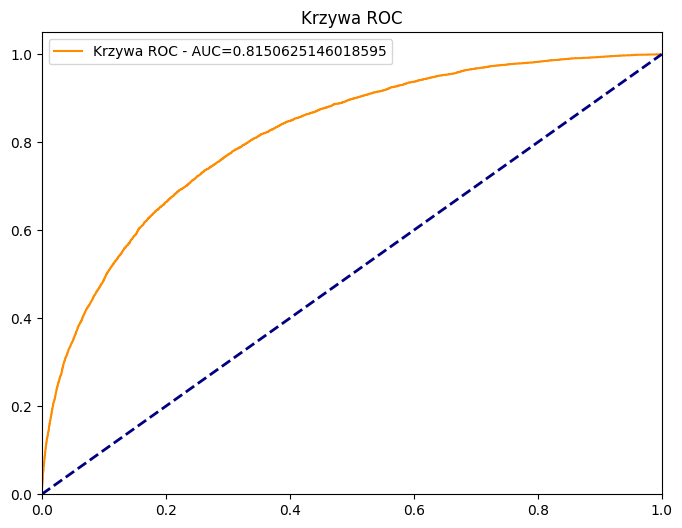

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Cobar

          	accuracy: 0.8065296251511487

          	sensitivity: 0.5613049872977671

          	specificity: 0.8699712892178906
        


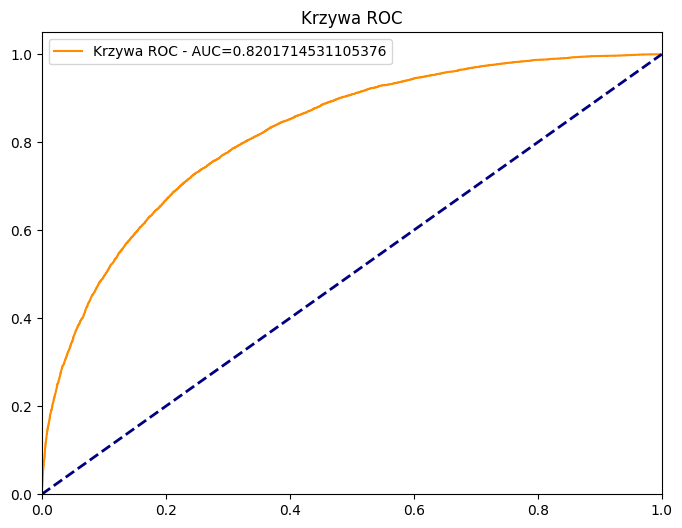

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w CoffsHarbour

          	accuracy: 0.8082334835660108

          	sensitivity: 0.5637286811613071

          	specificity: 0.8736545093531195
        


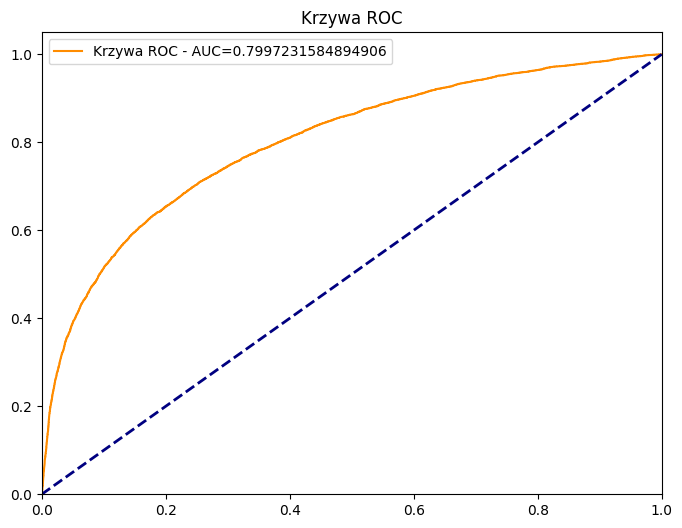

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Dartmoor

          	accuracy: 0.8160382543695723

          	sensitivity: 0.5979829325058185

          	specificity: 0.8629729819991316
        


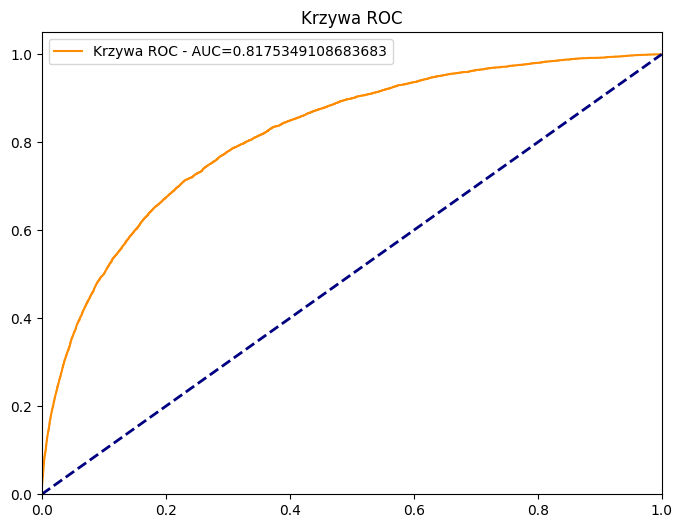

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Darwin

          	accuracy: 0.8015829394305816

          	sensitivity: 0.7596899224806202

          	specificity: 0.8032829077182647
        


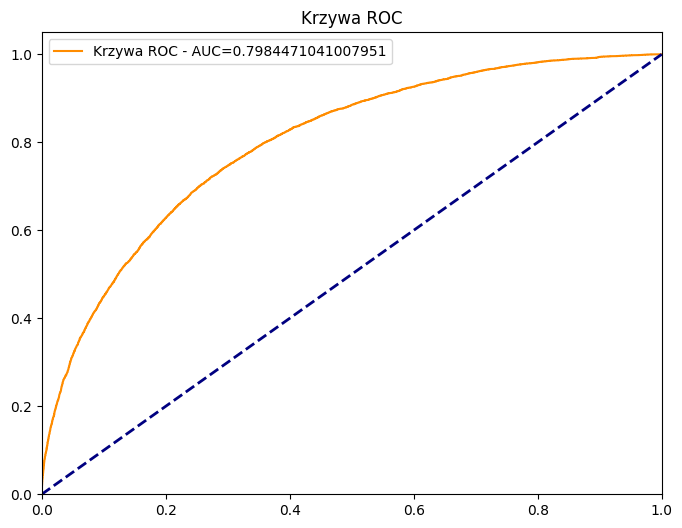

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w GoldCoast

          	accuracy: 0.8289546004177202

          	sensitivity: 0.6880017357344327

          	specificity: 0.84939740079927
        


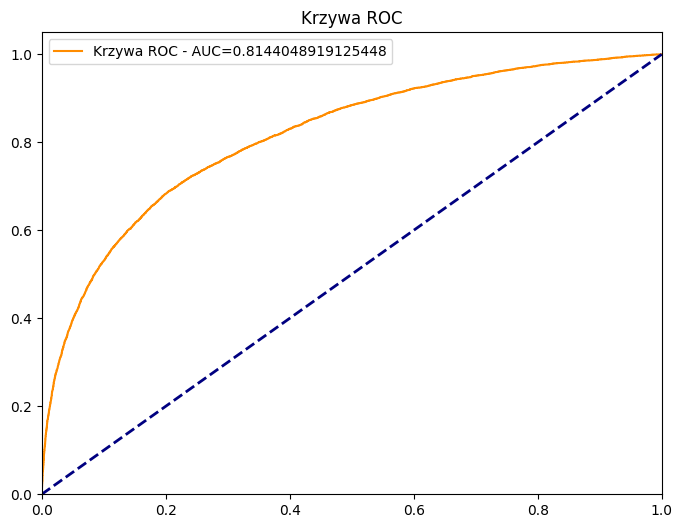

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Hobart

          	accuracy: 0.8213971639001869

          	sensitivity: 0.6271363794907568

          	specificity: 0.8577347165133424
        


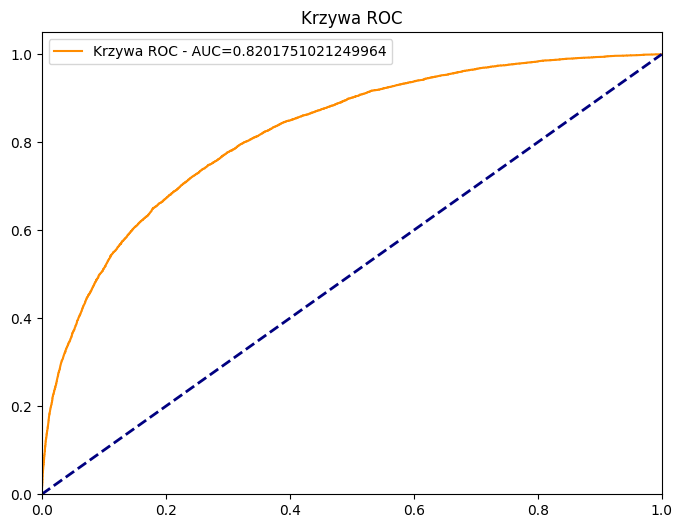

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Katherine

          	accuracy: 0.814938990876113

          	sensitivity: 0.7018818091779465

          	specificity: 0.8252045924638028
        


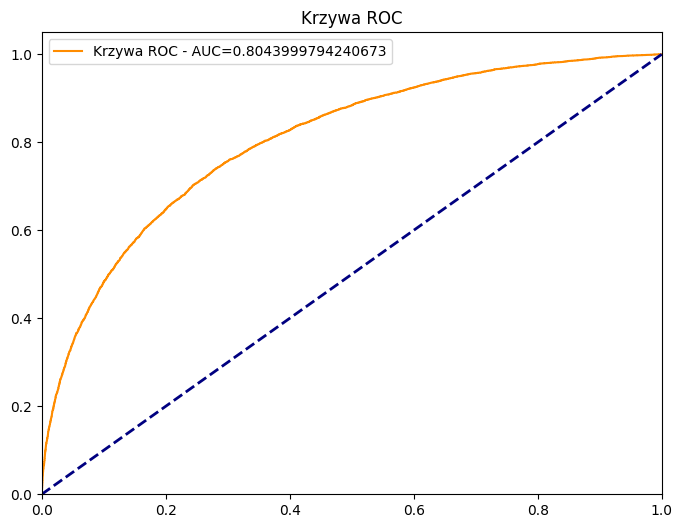

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Launceston

          	accuracy: 0.806941848961196

          	sensitivity: 0.5694072088173965

          	specificity: 0.8606861225315091
        


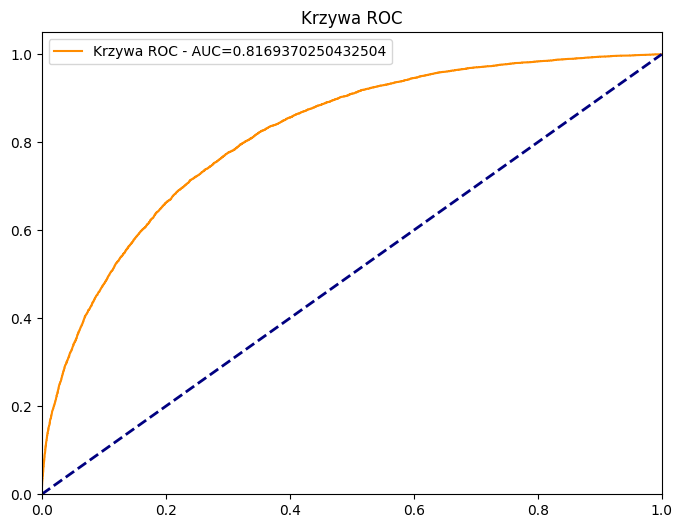

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Melbourne

          	accuracy: 0.8261239969220622

          	sensitivity: 0.691764705882353

          	specificity: 0.8438919658970689
        


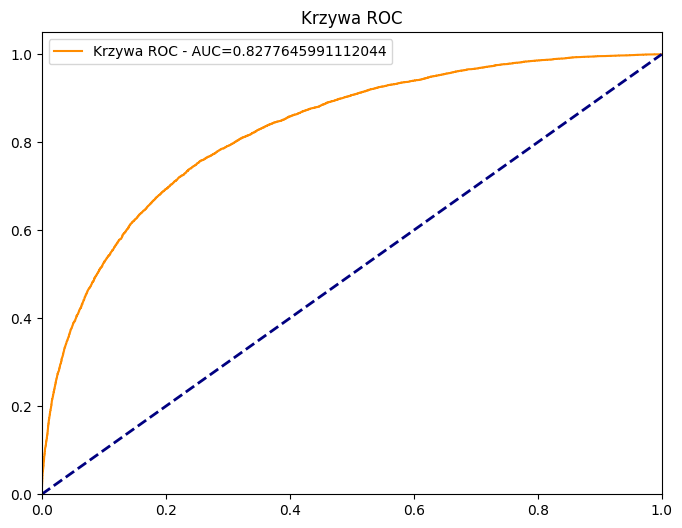

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w MelbourneAirport

          	accuracy: 0.7948499505331428

          	sensitivity: 0.5278343516632722

          	specificity: 0.880508166969147
        


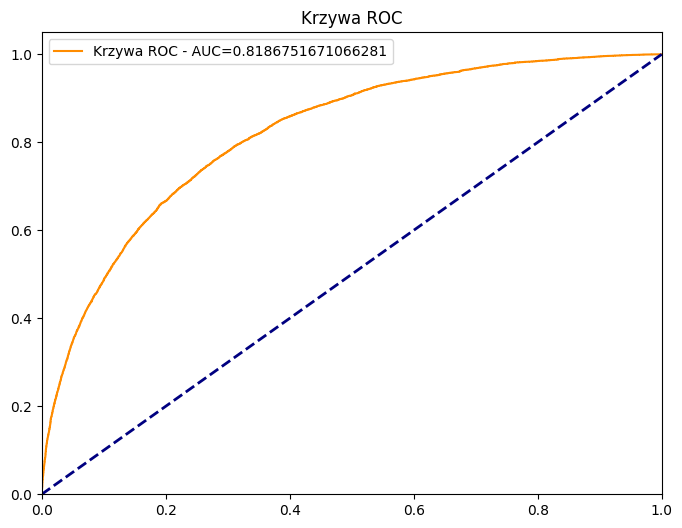

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Mildura

          	accuracy: 0.7893811146531824

          	sensitivity: 0.5161681933561417

          	specificity: 0.8799721886778644
        


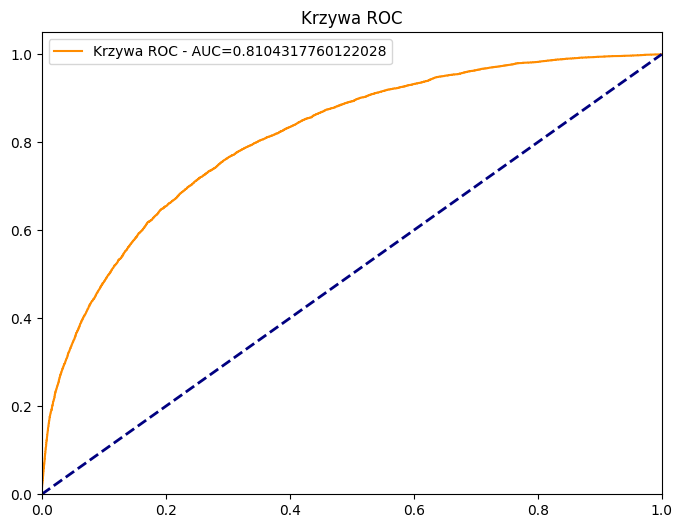

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Moree

          	accuracy: 0.8079586676926459

          	sensitivity: 0.5705548274355614

          	specificity: 0.8631821415263711
        


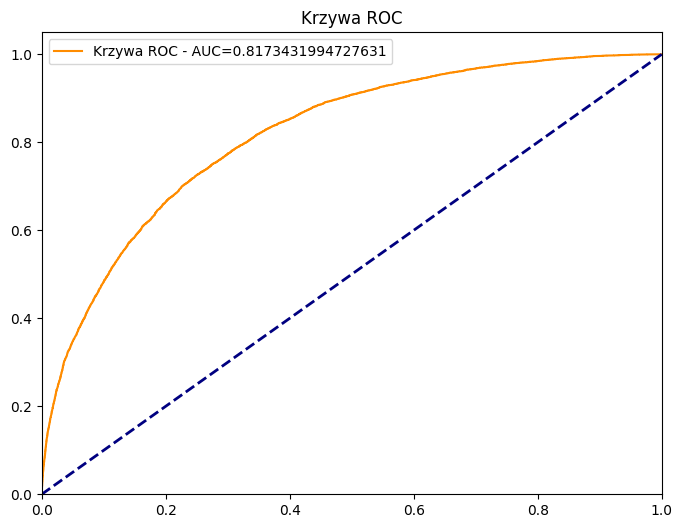

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w MountGambier

          	accuracy: 0.8252171045399582

          	sensitivity: 0.6237025561580171

          	specificity: 0.8686733705275115
        


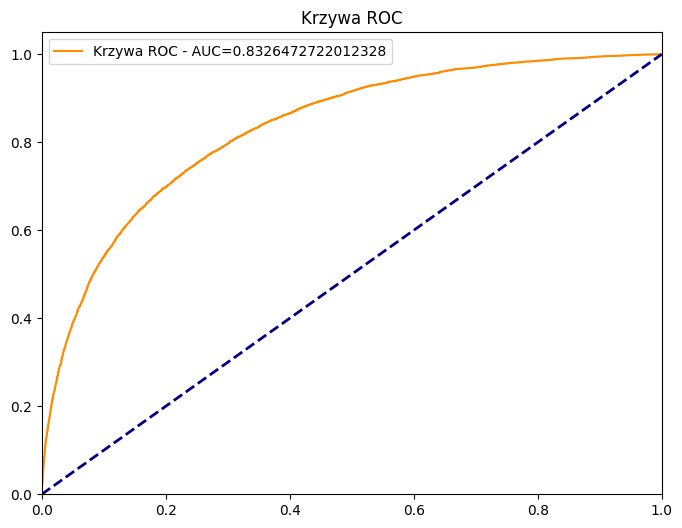

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w MountGinini

          	accuracy: 0.8076014070572717

          	sensitivity: 0.5889798957557707

          	specificity: 0.8454668558163528
        


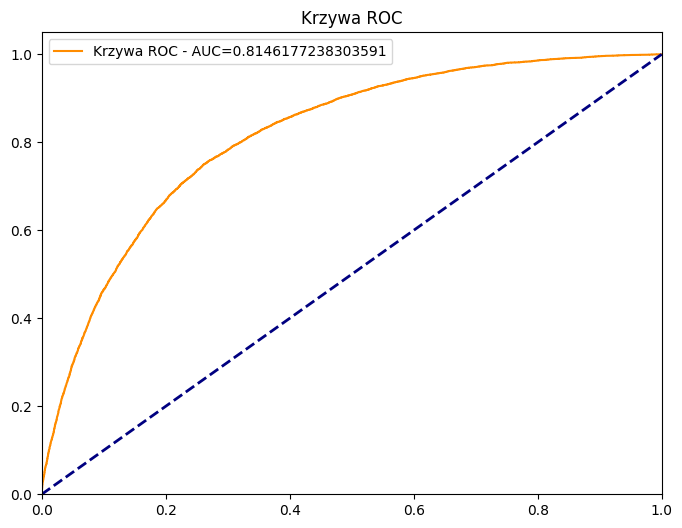

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Newcastle

          	accuracy: 0.814774101352094

          	sensitivity: 0.5845491176879255

          	specificity: 0.8715357473193792
        


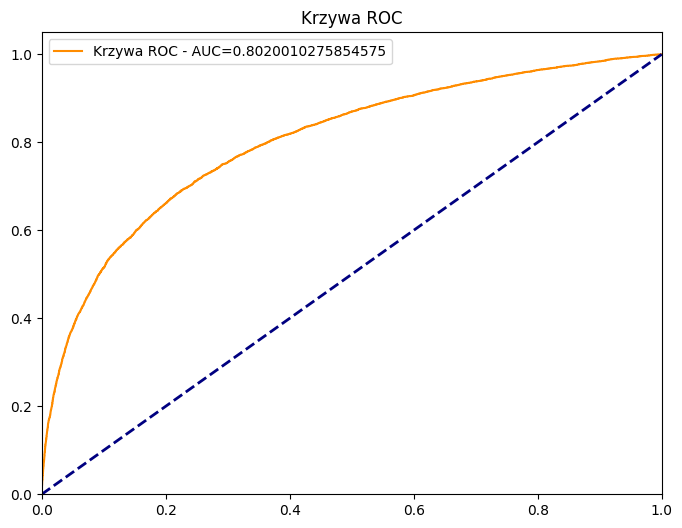

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Nhil

          	accuracy: 0.8155161042101792

          	sensitivity: 0.5979527559055118

          	specificity: 0.86150875557627
        


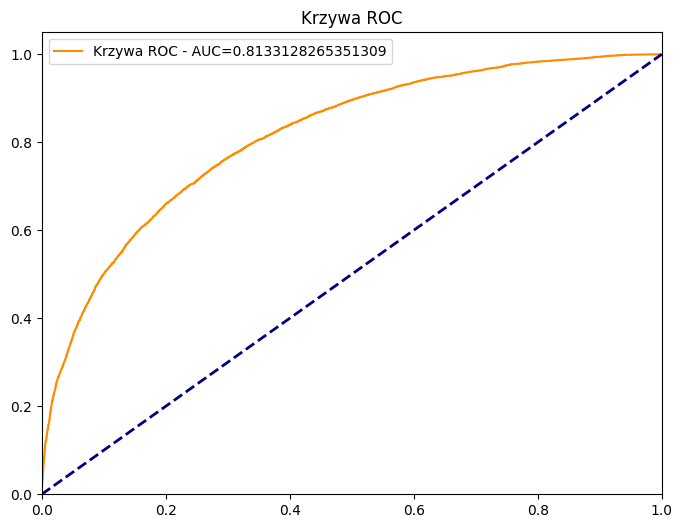

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w NorahHead

          	accuracy: 0.8289546004177202

          	sensitivity: 0.6851100192266609

          	specificity: 0.8501908096004037
        


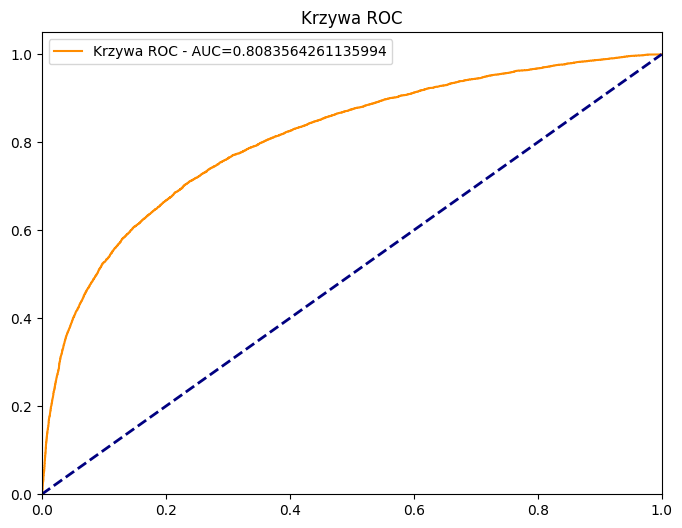

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w NorfolkIsland

          	accuracy: 0.8081785203913378

          	sensitivity: 0.5699155574638615

          	specificity: 0.864800516989218
        


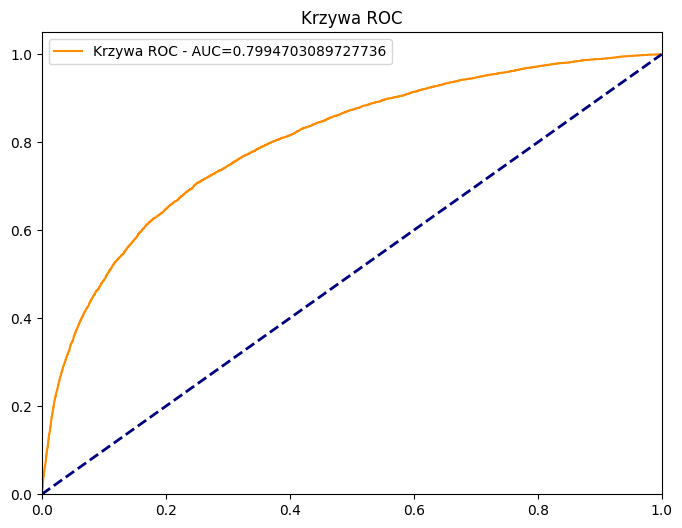

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Nuriootpa

          	accuracy: 0.8072991095965703

          	sensitivity: 0.5614194722474978

          	specificity: 0.8732183307196376
        


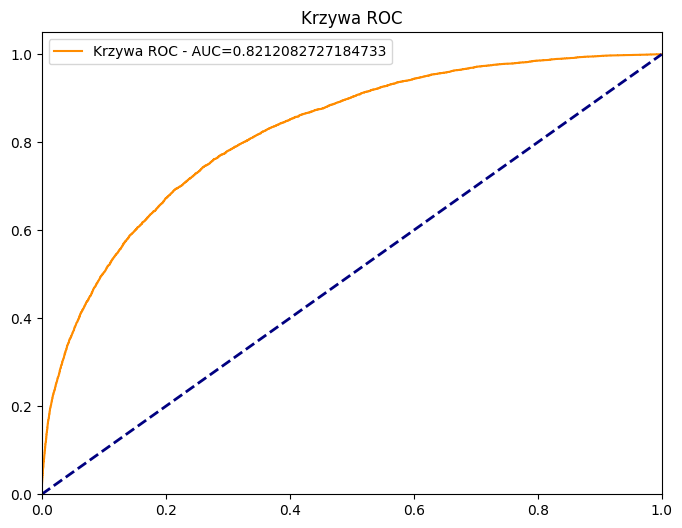

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w PearceRAAF

          	accuracy: 0.7921842365615038

          	sensitivity: 0.5285859024460848

          	specificity: 0.8539638386648123
        


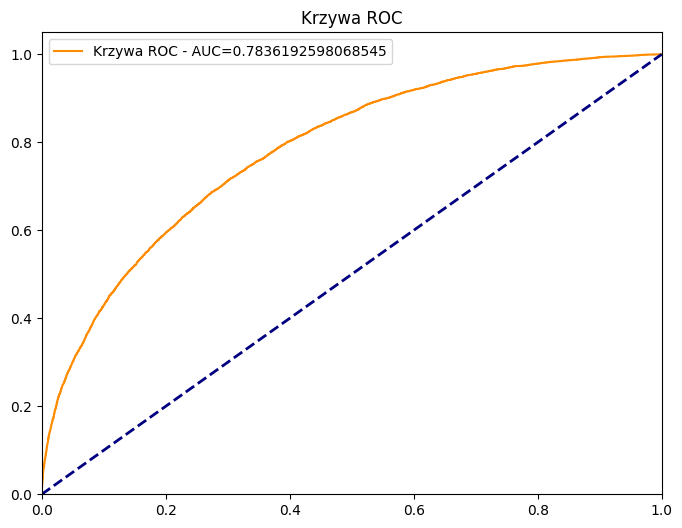

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Penrith

          	accuracy: 0.8173848521490601

          	sensitivity: 0.6022125272670614

          	specificity: 0.8634634634634635
        


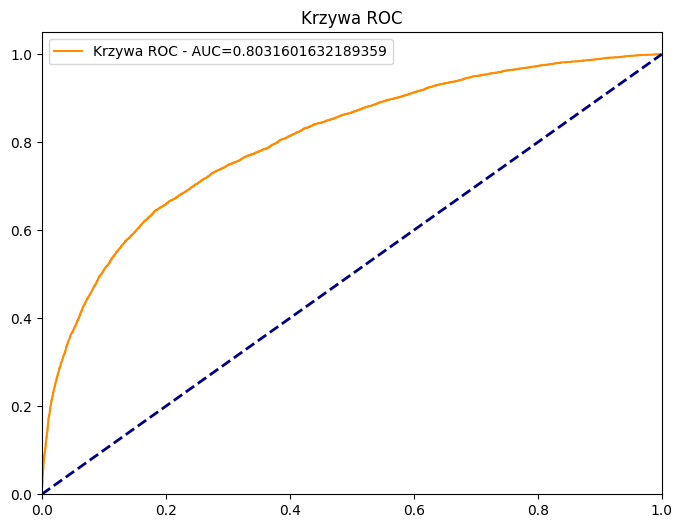

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Perth

          	accuracy: 0.7717104539958228

          	sensitivity: 0.4835742444152431

          	specificity: 0.8910002331545814
        


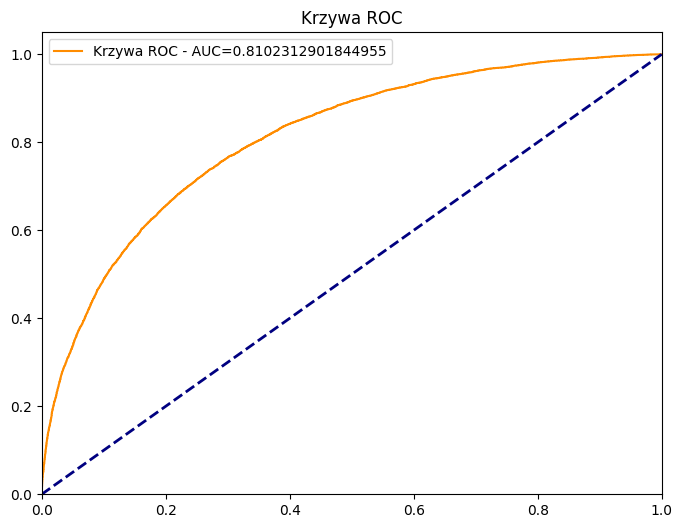

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w PerthAirport

          	accuracy: 0.7752280971748928

          	sensitivity: 0.48859667146085883

          	specificity: 0.8799054550911684
        


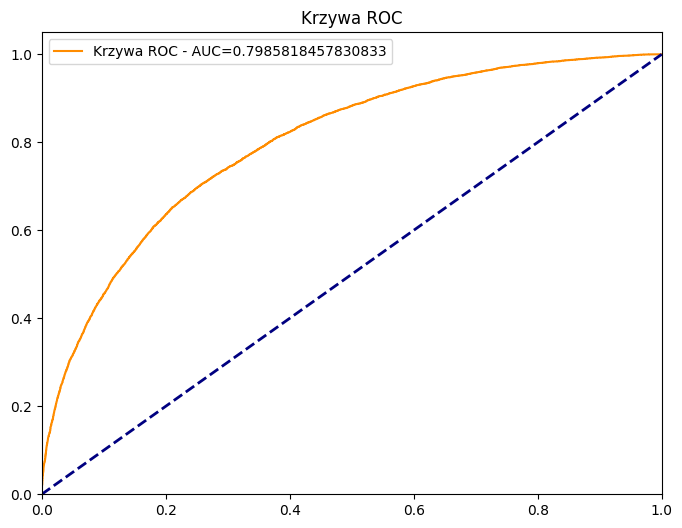

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Portland

          	accuracy: 0.8231834670770584

          	sensitivity: 0.6353296605651324

          	specificity: 0.8575468937940899
        


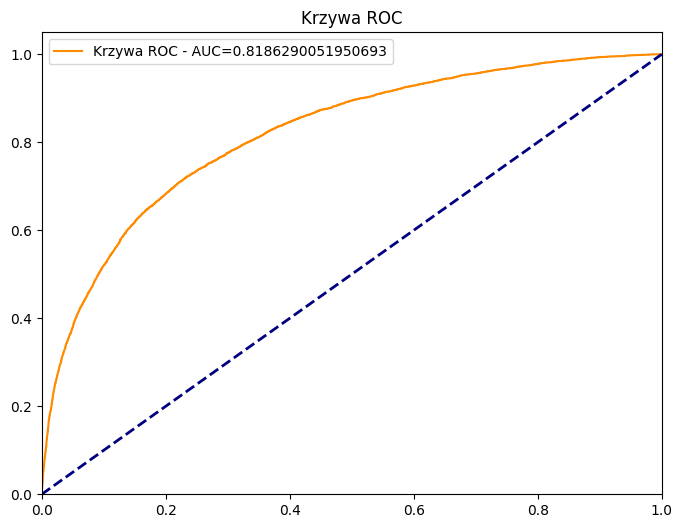

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Richmond

          	accuracy: 0.8288721556557107

          	sensitivity: 0.6325873697118333

          	specificity: 0.8717519421376909
        


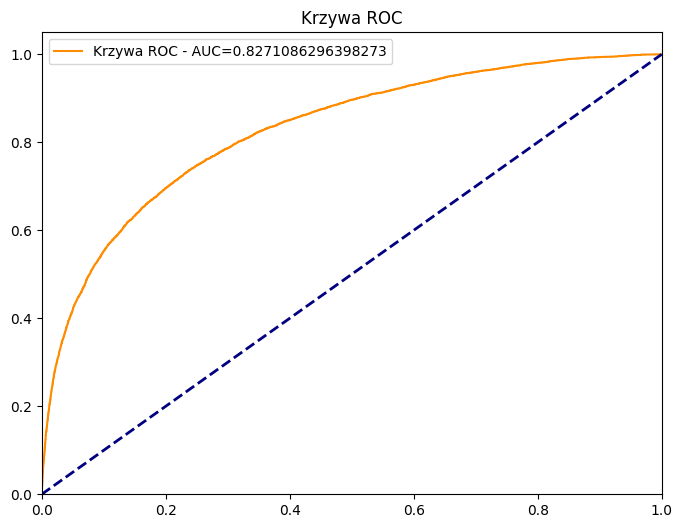

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Sale

          	accuracy: 0.8246125096185556

          	sensitivity: 0.6130653266331658

          	specificity: 0.8746898684702443
        


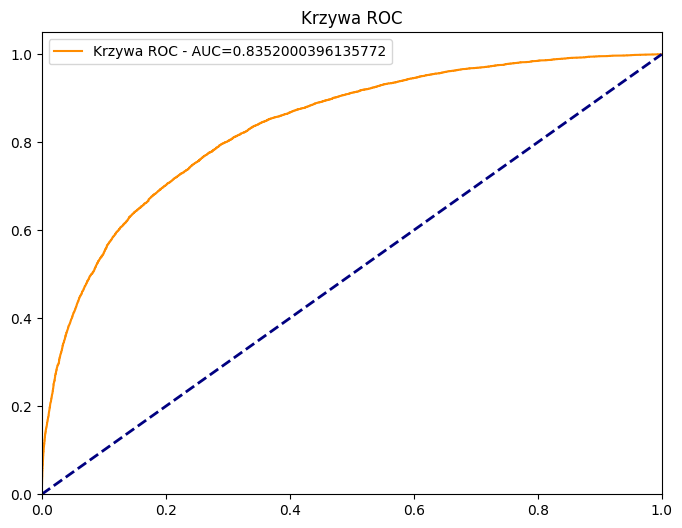

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w SalmonGums

          	accuracy: 0.7838298340112125

          	sensitivity: 0.5047489823609227

          	specificity: 0.8835751855858545
        


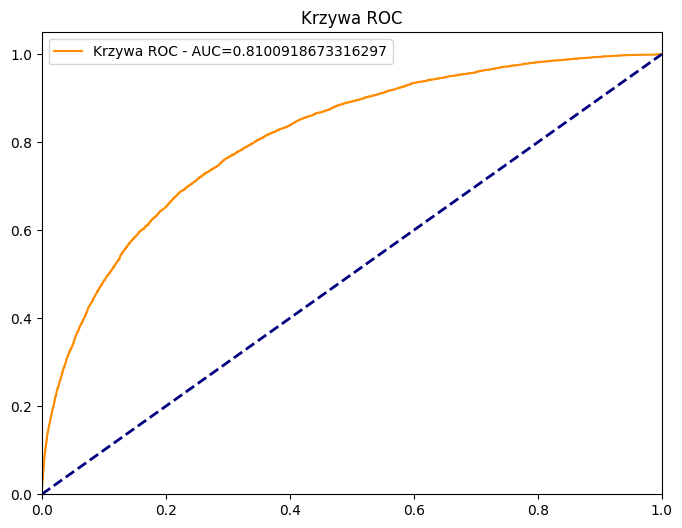

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Sydney

          	accuracy: 0.7905628229086512

          	sensitivity: 0.5166468489892985

          	specificity: 0.8956875570428963
        


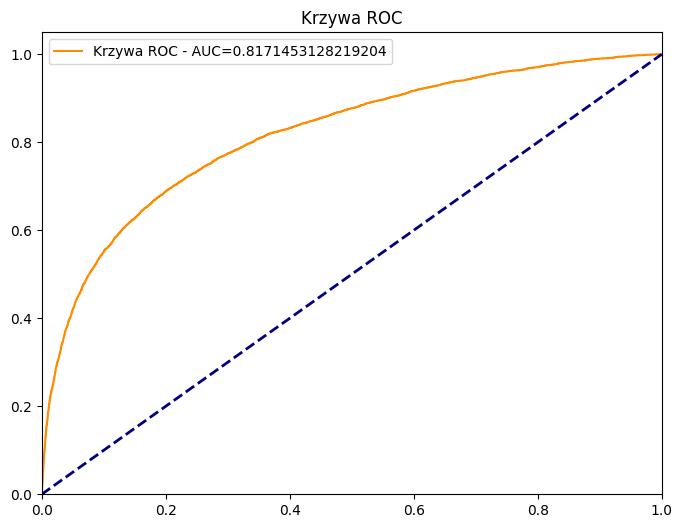

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w SydneyAirport

          	accuracy: 0.8195284159613059

          	sensitivity: 0.5846734892787524

          	specificity: 0.8879347054648687
        


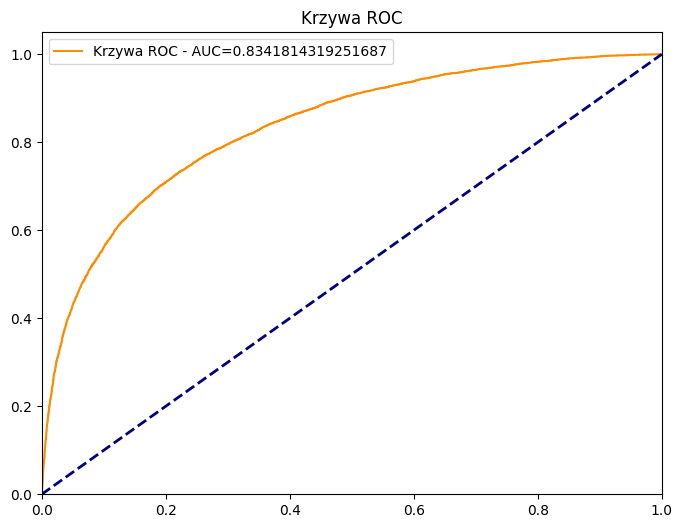

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Townsville

          	accuracy: 0.8182092997691547

          	sensitivity: 0.765637371338084

          	specificity: 0.822131002303467
        


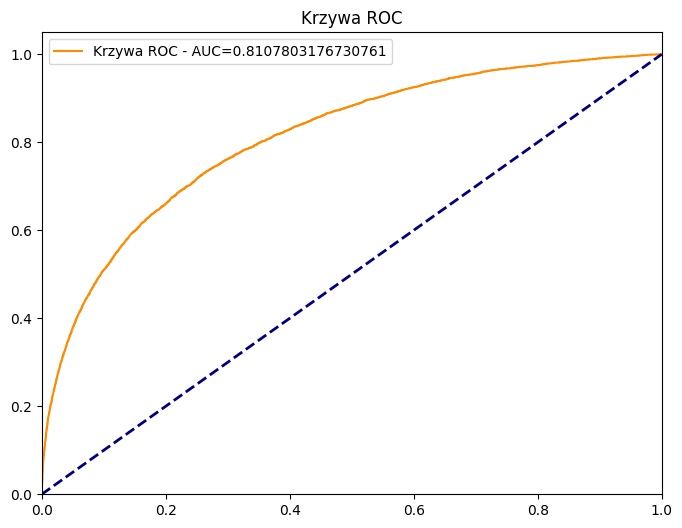

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Tuggeranong

          	accuracy: 0.793613279103001

          	sensitivity: 0.5256985167299069

          	specificity: 0.8777581163554946
        


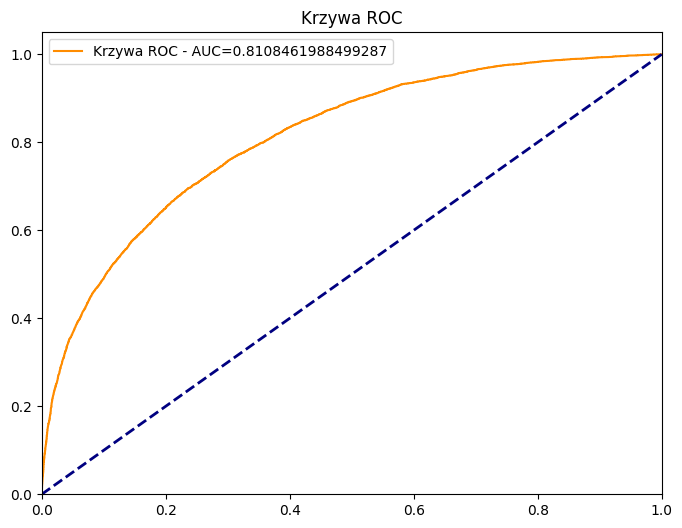

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Uluru

          	accuracy: 0.8107068264262944

          	sensitivity: 0.5664553027477309

          	specificity: 0.8800141118363027
        


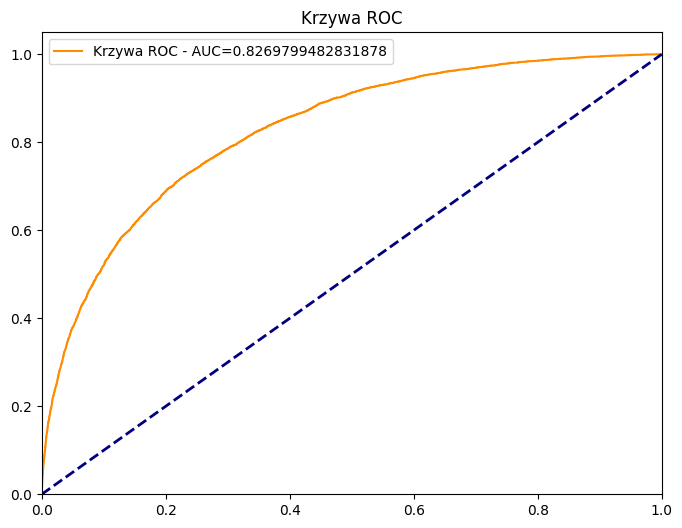

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w WaggaWagga

          	accuracy: 0.784819171155326

          	sensitivity: 0.506344290138875

          	specificity: 0.8904810644831116
        


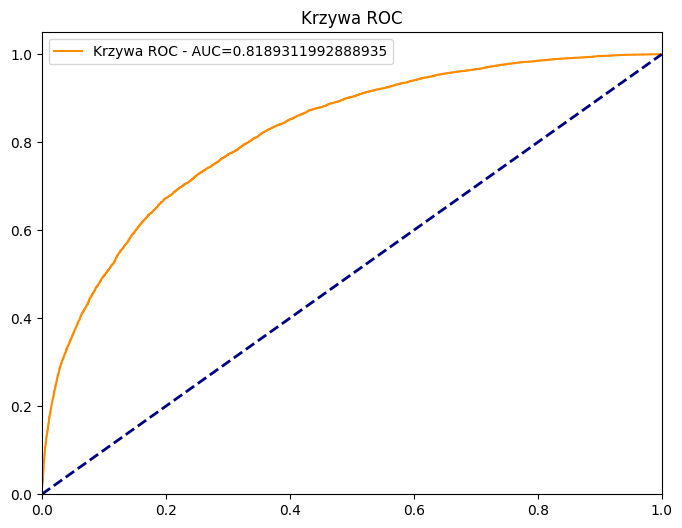

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Walpole

          	accuracy: 0.8313180169286578

          	sensitivity: 0.648829978726886

          	specificity: 0.8681507414869373
        


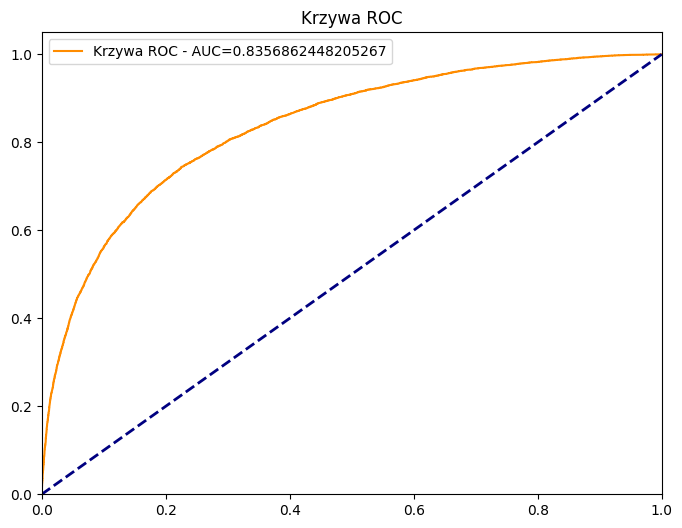

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Watsonia

          	accuracy: 0.8160107727822359

          	sensitivity: 0.5823974928179682

          	specificity: 0.8782805429864253
        


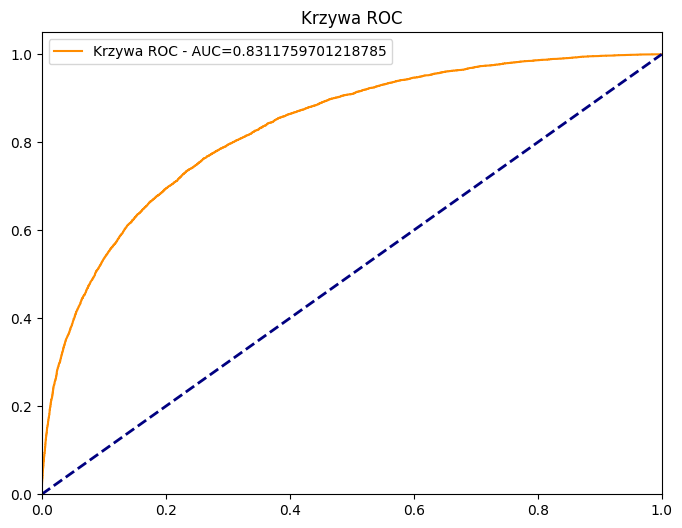

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Williamtown

          	accuracy: 0.8182092997691547

          	sensitivity: 0.6202078108204945

          	specificity: 0.854086866194897
        


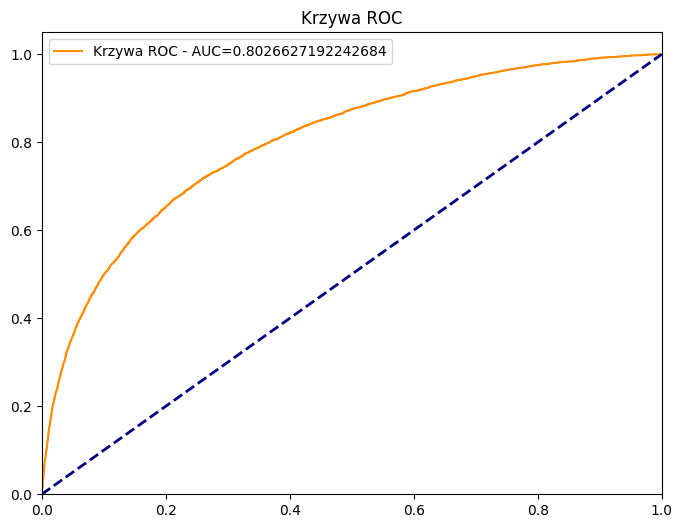

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Witchcliffe

          	accuracy: 0.8000164889524018

          	sensitivity: 0.539251904871854

          	specificity: 0.881483084469451
        


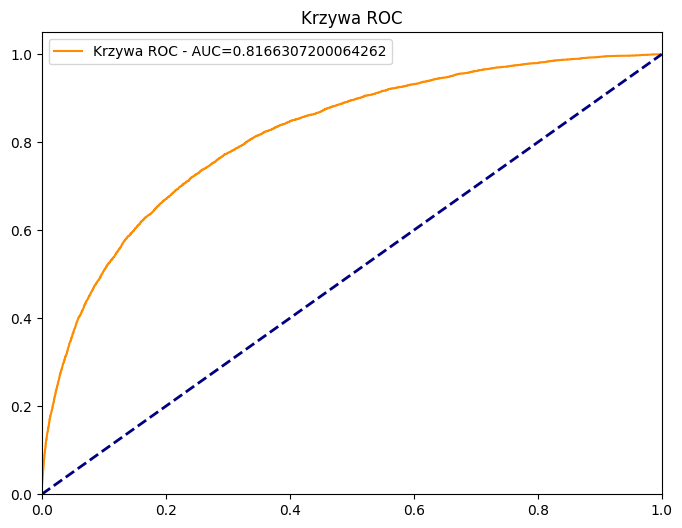

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Wollongong

          	accuracy: 0.8353578102671211

          	sensitivity: 0.7259770114942529

          	specificity: 0.8502091266620888
        


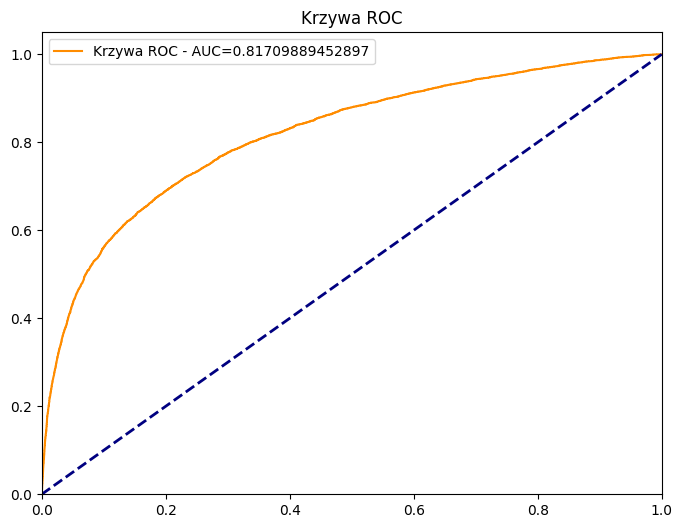

c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


	Zbiór krajowy dla modelu wytrenowanego w Woomera

          	accuracy: 0.8165604045289656

          	sensitivity: 0.6142602495543672

          	specificity: 0.8534342712326987
        


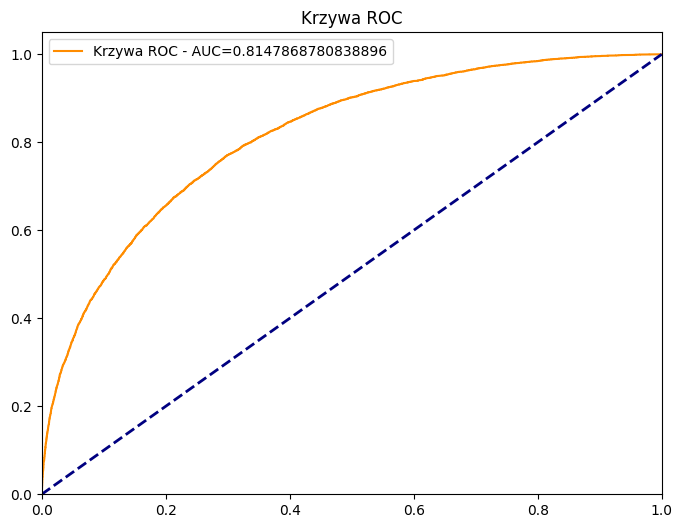

Najlepszy wynik uzyskał model z Wollongong. Accuracy=0.8353578102671211


In [ ]:
best_model=["",None,0]# nazwa, model, uzyskane accuracy na krajowm zbiorze
for name,model in models.items():
    y_pred=model.predict(X_national_test)
    y_score=model.decision_function(X_national_test)
    
    if(score:=accuracy_score(y_national_test,y_pred))>best_model[2]:
        best_model=[name,model,score]
    
    display_classifier_details(y_pred,y_national_test,f"Zbiór krajowy dla modelu wytrenowanego w {name}")
    plot_roc_curve(y_national_test,y_score)

print(f"Najlepszy wynik uzyskał model z {best_model[0]}. Accuracy={best_model[2]}")

#%% [markdown]

  # Zadanie na 5 - porównanie najlepszego modelu z DummyClassifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy=DummyClassifier()
dummy.fit(X_national_test,y_national_test)
y_dummy=dummy.predict(X_national_test)

display_classifier_details(y_dummy,y_national_test,f"Zbiór krajowy dla DummyClassifier")

	Zbiór krajowy dla DummyClassifier

          	accuracy: 0.7813290095635924

          	sensitivity: nan

          	specificity: 0.7813290095635924
        


<ipython-input-19-3dc4fe206d71>:26: RuntimeWarning: invalid value encountered in longlong_scalars
  sensitivity=tp/(tp+fp)
